## Credit EDA Case Study             
### Anirban Sarkar, Sayan De Sarkar
### 03-02-2020

In this case study, we undertake risk analysis in the banking and financial services. Through exploratory data analysis, we want to identify various factors that can be helpful in minizing the risk of loosing money while lending to customers. The framework of our analysis is as follows:

**Section I: Data Quality Check**. In this section, we explore the quality of the data provided to us. In Part A, we identify the missing data and undertake appropriate approach to deal with it. In Part B, we identidy outliers in the variables and suuggest ways to handle them. In Part C, we talk about the data imbalance.

**Section II: Exploratory Data Analysis**. In this section, we use graphical and statistical analysis to explore the factors that can identify the risk of default when credit is forwarded to the customers. In Part A, we explain the results of our univariate, segmented univariate and bivariate analysis. In Part B, we perform statistical correlation analysis to explain the relationship between various variables.

**Let's Begin!**

In [1]:
# importing packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# Load the two dataset here
#loading application data
app_data = pd.read_csv('application_data.csv')
app_data.head()
# loading the previous application data here
# prev_appli = pd.read_csv(dataloc + 'previous_application.csv')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,nan,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.56,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

In [3]:
print('Dimension of the data ',app_data.shape)

Dimension of the data  (307511, 122)


In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

In [6]:
#checking data type of each column
app_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


### Section I: Data Quality Check

#### PART A: Missing Value Treatment

In [7]:
# percentage missing values (column-wise) in the application data
round(100*(app_data.isnull().sum() / len(app_data.index)), 2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

There are quite a few variables in the dataset which has missing values. The share of missing values varies a lot across these variables. We are going to reject those variables where the missing values are more than 14% percent. For the remaining variables with missing values less than 14% will be considered and treated accordingly.

In [8]:
#dropping all the columns which has missing value more than 14%
application_df = app_data.drop(app_data.columns[app_data.isnull().mean() >= 0.14], axis = 1)
print('Dimension of the original dataset ',app_data.shape)
print('Dimension of the dataset after removing the missing values',application_df.shape)

Dimension of the original dataset  (307511, 122)
Dimension of the dataset after removing the missing values (307511, 71)


From the summary presented below, we now have variables where the percentage share of missing values by columns are less than 14%.

In [9]:
# percentage missing values (column-wise) after dropping columns which had more than 14% missing values
round(100*(application_df.isnull().sum() / len(application_df.index)), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

We are dropping a few more selected columns which we believe may not be important for our analysis. 

In [10]:
#list of columns to be dropped as these columns have no significant value for the analysis
li = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']

#dropping the above columns
application_df = application_df.drop(li, axis = 1)
print('Dimension of the data ',application_df.shape)

Dimension of the data  (307511, 40)


In [11]:
# counting the number of rows which has more than 50% columns have missing value
len(application_df[application_df.isnull().sum(axis = 1) > len(application_df.columns) //2].index)

0

We also check for the rows where the percentage share of missing values is more than 50%. As we can see, there are no row present in the data frame where we have more than 50% columns have missing values. So we are not treating the missing values row wise.

In [12]:
# list of columns in the application dataset
print(application_df.columns)
print(application_df.dtypes.value_counts())

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_B

In [13]:
# CODE_GENDER ['M' 'F' 'XNA']. removing rows which has value XNA
application_df = application_df.loc[application_df['CODE_GENDER'] != 'XNA']
application_df.shape

(307507, 40)

#### PART B: Treatment of outliers

In [14]:
# checking the distribution of a subset of continuous variables
round(application_df[['AMT_GOODS_PRICE', 'EXT_SOURCE_2']].describe(), 3)

,AMT_GOODS_PRICE,EXT_SOURCE_2
count,307229.00,306847.00
mean,538397.72,0.51
std,369447.25,0.19
min,40500.00,0.00
25%,238500.00,0.39
50%,450000.00,0.57
75%,679500.00,0.66
max,4050000.00,0.85


We can see the the percentile value of `EXT_SOURCE_2` is gradually increasing and thus we can conclude that there is no outliers like that in the `AMT_GOODS_PRICE` variable. Therefore, we can impute the missing values of the `EXT_SOURCE_2` column with its mean and we drop the missing value rows of `AMT_GOODS_PRICE`.

In [15]:
# imputing EXT_SOURCE_2 by its mean value
application_df.loc[np.isnan(application_df['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = application_df['EXT_SOURCE_2'].mean()

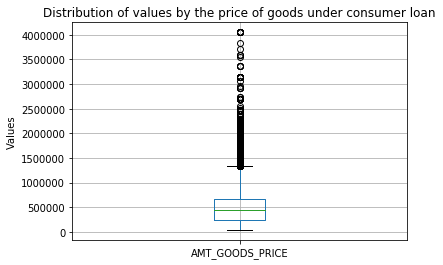

In [16]:
#plotting AMT_GOODS_PRICE to show outliers
ax = application_df.boxplot(column='AMT_GOODS_PRICE')
plt.title('Distribution of values by the price of goods under consumer loan')
#ax.set_xlabel('Price of Goods')
ax.set_ylabel('Values')
plt.show()

In [17]:
#dropping the rows which contain AMT_GOODS_PRICE NaN values
application_df = application_df[~np.isnan(application_df['AMT_GOODS_PRICE'])]

In [18]:
# remove the rows where the values from multiple columns related to Credit Bureau information is null
col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
application_df = application_df.dropna(axis=0, subset= col)

 NOT NEEDED We can drop some columns related to the number of enquery with Credit Bureau. We can keep `AMT_REQ_CREDIT_BUREAU_YEAR` to find the number of enquery per yearly basis and drop other coulmns

The data type of the columns are appropriate. So, we are not changing the data type of any column

In [19]:
#calculating the percentage of retained rows
round((application_df.shape[0] / app_data.shape[0])*100,2)

86.42

We have retained 86.4% rows after cleaning the data for our analysis so far.

In [20]:
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,-1134.00,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,-828.00,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,-815.00,0.00,0.00,0.00,0.00,0.00,0.00
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,-1106.00,0.00,0.00,0.00,0.00,0.00,0.00
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,State servant,Secondary / secondary special,Married,House / apartment,0.04,-16941,-1588,-4970.00,-477,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,-2536.00,0.00,0.00,0.00,0.00,1.00,1.00


In [21]:
# another set of continuous variables
round(application_df[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]))

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH
count,265756.00,265756.00,265745.00,265756.00,265756.00
mean,171309.00,606600.00,27186.00,545040.00,-16117.00
std,248481.00,404836.00,14388.00,371445.00,4309.00
min,26100.00,45000.00,1616.00,40500.00,-25201.00
5%,67500.00,142200.00,9000.00,135000.00,-23198.00
25%,112500.00,272520.00,16636.00,238500.00,-19715.00
50%,157500.00,521280.00,24988.00,450000.00,-15813.00
75%,202500.00,813195.00,34749.00,684000.00,-12569.00
90%,270000.00,1157958.00,45954.00,1125000.00,-10427.00
95%,337500.00,1350000.00,53253.00,1327500.00,-9619.00


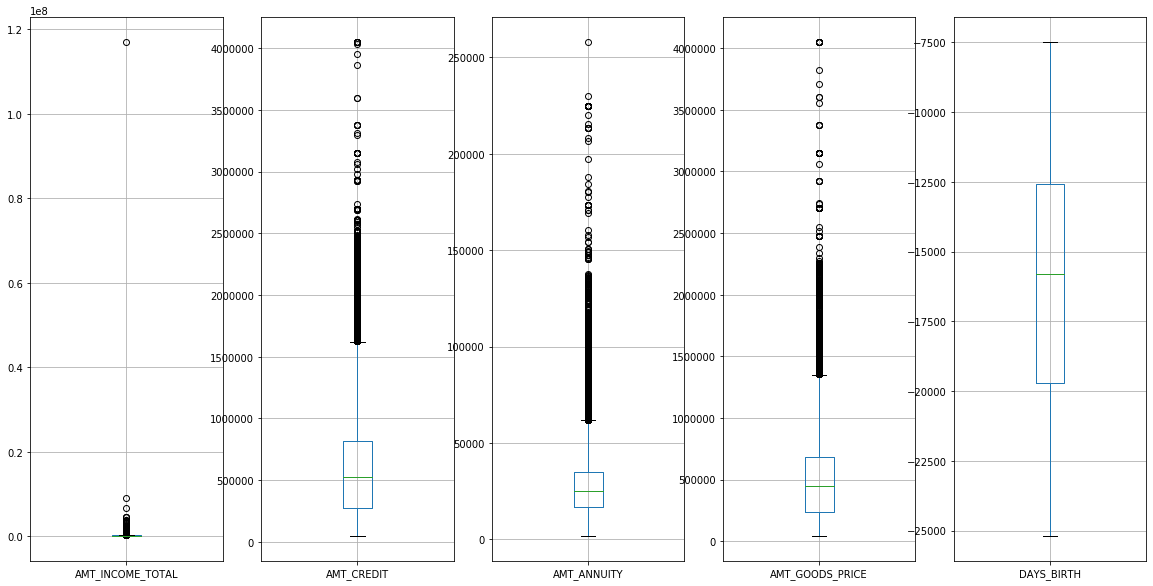

In [22]:
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    application_df.boxplot(column = col)
plt.show()

We observe that `AMT_INCOME_TOTAL`,`AMT_CREDIT`,`AMT_ANNUITY`,`AMT_GOODS_PRICE` variables have huge outliers as we can see the spike at 100 percentile. So we will  use 1.5 IQR rule to remove outliers

In [23]:
# removing outliers using 1.5 IQR method
for col in cols: 
    q1 = application_df[col].quantile(0.25)
    q3 = application_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    application_df = application_df.loc[(application_df[col] > range_low) & (application_df[col] < range_high)]

In [24]:
# percentage data lost 
100 * ((app_data.shape[0] - application_df.shape[0]) / app_data.shape[0])

22.582931992676684

Almost 23% of the total rows lost for data cleaning compared to the raw dataset

In [25]:
#converting DAYS_BIRTH to year
application_df['DAYS_BIRTH'] = abs(application_df['DAYS_BIRTH'] // 365)

#### Binning `AMT_INCOME_TOTAL` , `DAYS_BIRTH`, `AMT_CREDIT` 

In [26]:
print(application_df['AMT_INCOME_TOTAL'].describe())
q25 = application_df['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = application_df['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count   238066.00
mean    151836.60
std      61231.31
min      26100.00
25%     112500.00
50%     135000.00
75%     184500.00
max     337050.00
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 157500.0)

In [27]:
# Creating income category groups
def income_category(value):
    if value <= q25:
        return 'Low'
    elif value > q25 and value <= q60:
        return 'Medium'
    else:
        return 'High'

application_df['INCOME_CATEGORY'] = application_df['AMT_INCOME_TOTAL'].apply(income_category)

In [28]:
# Creating age gategory groups
def age_category(value):
    if value <= 35:
        return 'Young'
    elif value > 35 and value <= 55:
        return 'Mid Age'
    else:
        return 'Old'
application_df['AGE_CATEGORY'] = application_df['DAYS_BIRTH'].apply(age_category)

In [29]:
print(round(application_df['AMT_CREDIT'].describe(), 3))
q50 = application_df['AMT_CREDIT'].quantile(0.5)
q75 = application_df['AMT_CREDIT'].quantile(0.75)

q50,q75

count    238066.00
mean     535481.08
std      318890.92
min       45000.00
25%      270000.00
50%      481495.50
75%      755190.00
max     1597779.00
Name: AMT_CREDIT, dtype: float64


(481495.5, 755190.0)

In [30]:
# creating Credit amount groups
def credit_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['CREDIT_CATEGORY'] = application_df['AMT_CREDIT'].apply(credit_category)

#### PART C: Imbalance in the Target variable column

In [31]:
# The ratio of the applicants with no payment difficulties (Target = 0) and with payment difficulties (Target = 1)
100*application_df['TARGET'].value_counts(normalize = True)

0   91.98
1    8.02
Name: TARGET, dtype: float64

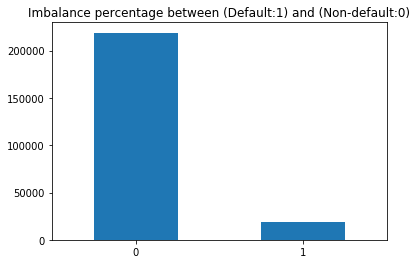

In [32]:
# graphical analysis of the share
application_df['TARGET'].value_counts().plot(kind='bar')
plt.title('Imbalance percentage between (Default:1) and (Non-default:0)')
plt.xticks(rotation = 0)
plt.show()

There is a large imbalance between the proportion of default (TARGET = 1) and non-default (TARGET = 0) in the dataset. The ratio of non-deafult to default is 11.4:1. Even if the default ratio is low, default of any application is costly and should be analyzed closely.

### Section II: Exploratory Data Analysis

In [33]:
#creating dataframe with TARGET = 1 (payment defaulted)
app_target_default = application_df.loc[application_df['TARGET'] == 1]
print('Dimension of the default dataset',app_target_default.shape)
display(app_target_default.head())

print(                           )
#creating dataframe with TARGET = 0 (payment not defaulted)
app_target_nondefault = application_df.loc[application_df['TARGET'] == 0]
print('Dimension of the non-default dataset',app_target_nondefault.shape)
display(app_target_nondefault.head())

Dimension of the default dataset (19094, 43)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,26,-637,-3648.00,-2120,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.26,-1134.00,0.00,0.00,0.00,0.00,0.00,1.00,High,Young,Low
26,100031,1,Cash loans,F,N,Y,0,112500.00,979992.00,27076.50,702000.00,Working,Secondary / secondary special,Widow,House / apartment,0.02,52,-2628,-6573.00,-1827,1.00,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.55,-161.00,0.00,0.00,0.00,0.00,2.00,2.00,Low,Mid Age,High
40,100047,1,Cash loans,M,N,Y,0,202500.00,1193580.00,35028.00,855000.00,Commercial associate,Secondary / secondary special,Married,House / apartment,0.03,48,-1262,-1182.00,-1029,2.00,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.31,-1075.00,0.00,0.00,0.00,2.00,0.00,4.00,High,Mid Age,High
42,100049,1,Cash loans,F,N,N,0,135000.00,288873.00,16258.50,238500.00,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,37,-3597,-45.00,-4409,2.00,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.67,-1480.00,0.00,0.00,0.00,0.00,0.00,2.00,Medium,Mid Age,Low
81,100096,1,Cash loans,F,N,Y,0,81000.00,252000.00,14593.50,252000.00,Pensioner,Secondary / secondary special,Married,House / apartment,0.03,68,365243,-5391.00,-4199,2.00,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,Old,Low



Dimension of the non-default dataset (218972, 43)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,State servant,Higher education,Married,House / apartment,0.00,46,-1188,-1186.00,-291,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.62,-828.00,0.00,0.00,0.00,0.00,0.00,0.00,High,Mid Age,High
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,53,-225,-4260.00,-2531,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.56,-815.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,Mid Age,Low
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,55,-3038,-4311.00,-3458,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.32,-1106.00,0.00,0.00,0.00,0.00,0.00,0.00,Medium,Mid Age,Medium
5,100008,0,Cash loans,M,N,Y,0,99000.00,490495.50,27517.50,454500.00,State servant,Secondary / secondary special,Married,House / apartment,0.04,47,-1588,-4970.00,-477,2.00,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.35,-2536.00,0.00,0.00,0.00,0.00,1.00,1.00,Low,Mid Age,Medium
8,100011,0,Cash loans,F,N,Y,0,112500.00,1019610.00,33826.50,913500.00,Pensioner,Secondary / secondary special,Married,House / apartment,0.02,56,365243,-7427.00,-3514,2.00,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.21,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Low,Old,High


#### PART A: Graphical Analysis

In [34]:
app_target_default.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_B

In [35]:
categorical = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY', 'CREDIT_CATEGORY']

continious = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2', 'EXT_SOURCE_3']

#### 1.Graphical analysis of categorical columns

#### a. Contract Type

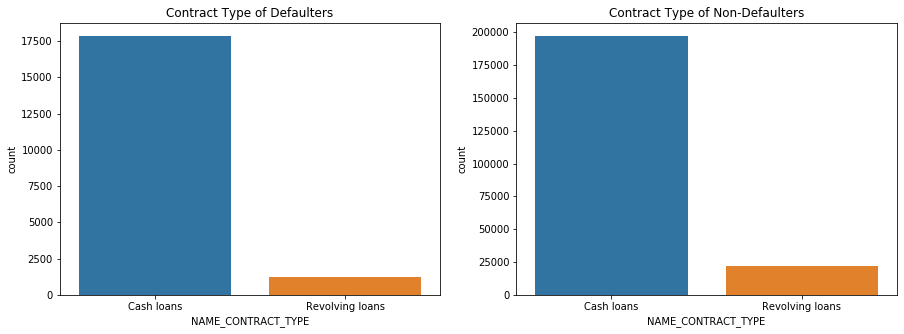

In [36]:
# plotting based on 'NAME_CONTRACT_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_default)
plt.title('Contract Type of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_nondefault)
plt.title('Contract Type of Non-Defaulters')

plt.show()

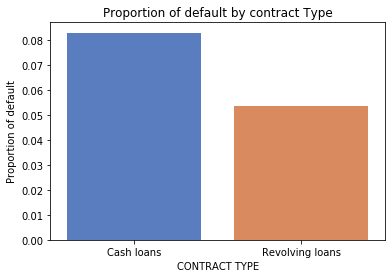

In [37]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_CONTRACT_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_CONTRACT_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_CONTRACT_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_CONTRACT_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('CONTRACT TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Number of Cash loans are higher in both default/ non-default cases than Revolving loans. The proportion of default is higher in cash loan category compared to the revolving loans

#### b. Gender

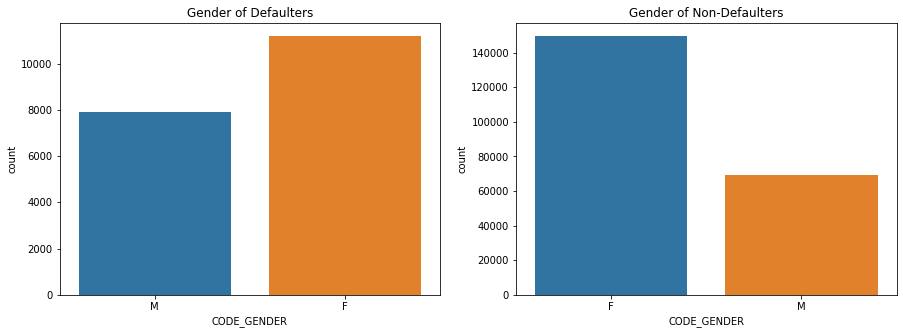

In [38]:
# plotting based on 'CODE_GENDER' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = app_target_default)
plt.title('Gender of Defaulters')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = app_target_nondefault)
plt.title('Gender of Non-Defaulters')

plt.show()

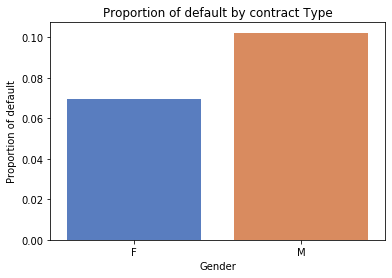

In [39]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['CODE_GENDER'])['TARGET'].value_counts()/application_df.groupby(['CODE_GENDER'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['CODE_GENDER'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['CODE_GENDER','Non-default']
ax2 = sns.barplot(x='CODE_GENDER', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by contract Type')
plt.show()

Number of Female clients are more in both the cases default/non-default. And the proportion of default is lower among female applicants than that of the male.

#### c. Car Ownership Status

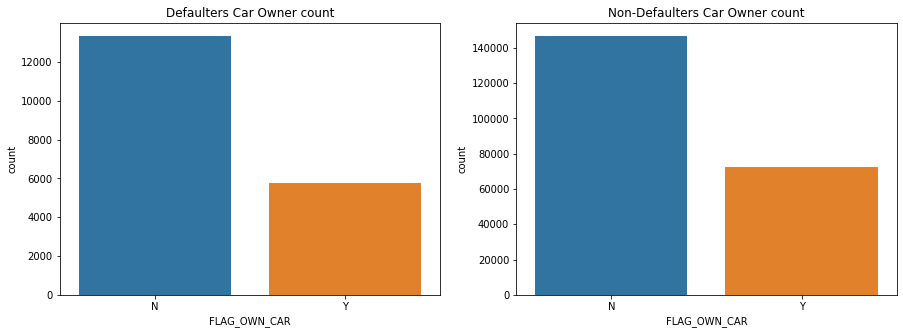

In [40]:
# plotting based on 'FLAG_OWN_CAR' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_default)
plt.title('Defaulters Car Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_nondefault)
plt.title('Non-Defaulters Car Owner count')

plt.show()

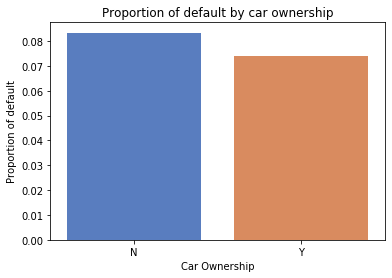

In [41]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_CAR'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_CAR'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_CAR','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_CAR', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Car Ownership')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by car ownership')
plt.show()

Defalut/Non-default both the cases, the count of client who do not own car is higher than who owns a car. The proportion of default is higher for non-car owners relative to the car owners.

#### d. Realty Ownership Status

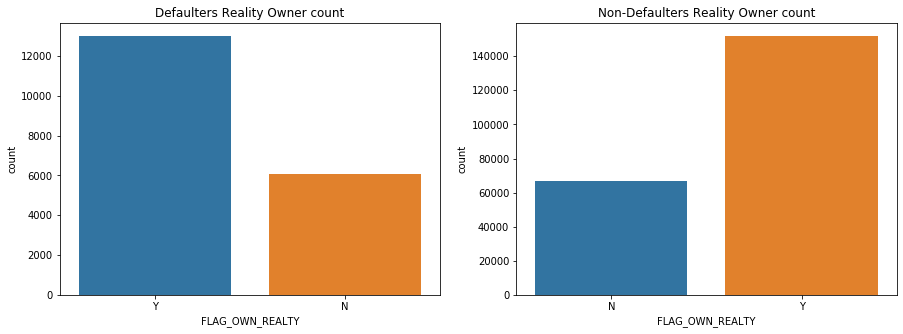

In [42]:
# plotting based on 'FLAG_OWN_REALTY' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_default)
plt.title('Defaulters Reality Owner count')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_nondefault)
plt.title('Non-Defaulters Reality Owner count')

plt.show()

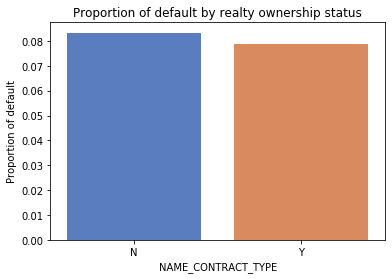

In [43]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].value_counts()/application_df.groupby(['FLAG_OWN_REALTY'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['FLAG_OWN_REALTY'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['FLAG_OWN_REALTY','Non-default']
ax2 = sns.barplot(x='FLAG_OWN_REALTY', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_CONTRACT_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by realty ownership status')
plt.show()

Defalut/Non-default both the cases, the count of client who do own real estate is higher than who has not. Applicants with no realty ownership has a higher propensity to default than the clients who own real estate.

#### e. Income Type

In [44]:
display(pd.DataFrame(app_target_default['NAME_INCOME_TYPE'].value_counts()))
display(pd.DataFrame(app_target_nondefault['NAME_INCOME_TYPE'].value_counts()))

,NAME_INCOME_TYPE
Working,11838
Commercial associate,3924
Pensioner,2338
State servant,994


,NAME_INCOME_TYPE
Working,113560
Commercial associate,47279
Pensioner,42339
State servant,15774
Student,13
Unemployed,4
Businessman,2
Maternity leave,1


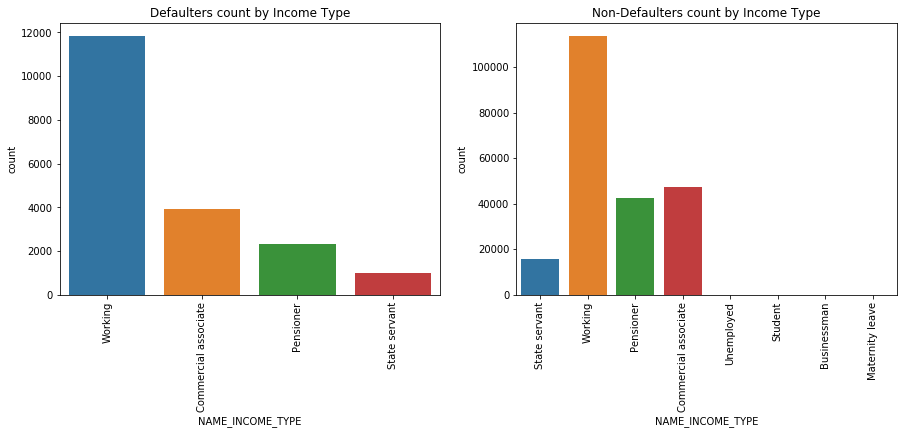

In [45]:
# plotting based on 'NAME_INCOME_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count by Income Type')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count by Income Type')

plt.show()

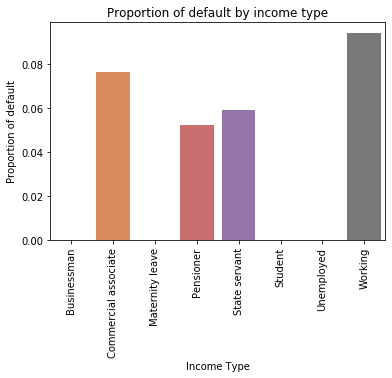

In [46]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_INCOME_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_INCOME_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_INCOME_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_INCOME_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('Income Type')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by income type')
plt.xticks(rotation = 90)
plt.show()

Majority of the applicants are from working, commercial associate, pensioners and state servants. The remaining categories of income types are very small. The proportion of default is high among the working and the commercial associates. It is relatively lower for the pensioner and state servant.

#### f. Education Type

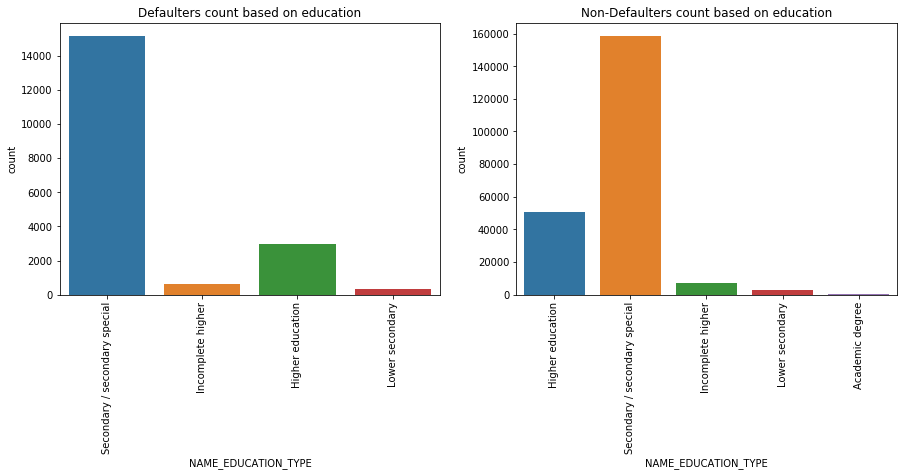

In [47]:
# plotting based on 'NAME_EDUCATION_TYPE' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on education')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on education')

plt.show()

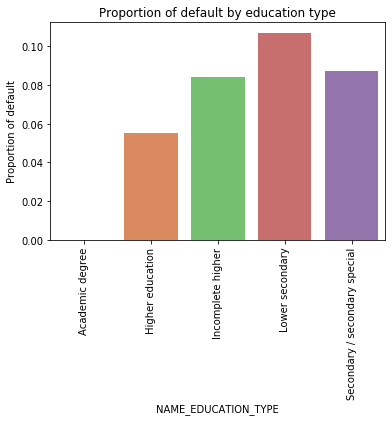

In [48]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].value_counts()/application_df.groupby(['NAME_EDUCATION_TYPE'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_EDUCATION_TYPE'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_EDUCATION_TYPE','Non-default']
ax2 = sns.barplot(x='NAME_EDUCATION_TYPE', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_EDUCATION_TYPE')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by education type')
plt.xticks(rotation = 90)
plt.show()

Applicants with secondary and higher secondary education are among the highest defaulters as well as not defaulters. Whereas, applicants with academic degrees are the smallest group of applicants that have applied for the loan and applicants from this background has no recorded of default.
From the above figure, we see that a distinct pattern emerges. The chances of default is lower as the education level of the applicants increases.

#### g. Family Status

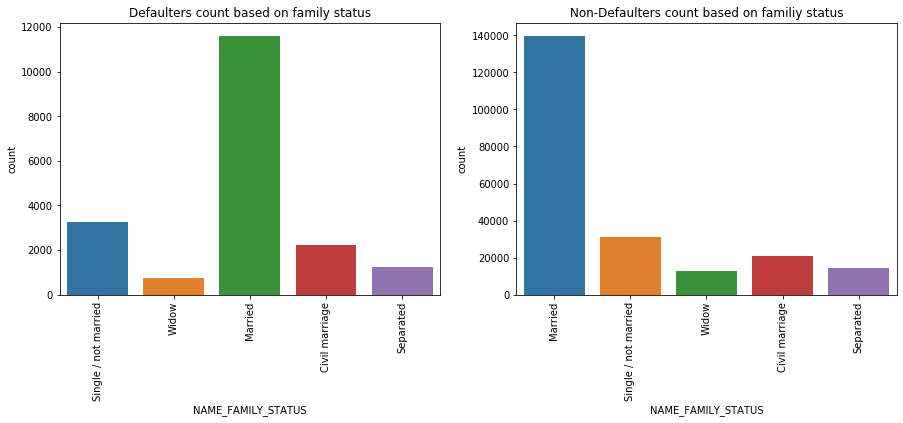

In [49]:
# plotting based on 'NAME_FAMILY_STATUS' counts
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_default)
plt.xticks(rotation = 90)
plt.title('Defaulters count based on family status')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_nondefault)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters count based on familiy status')

plt.show()

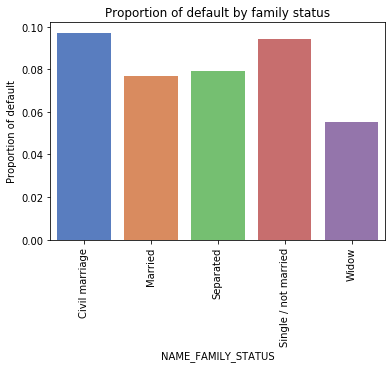

In [50]:
# proportion of non-default
c = pd.DataFrame(application_df.groupby(['NAME_FAMILY_STATUS'])['TARGET'].value_counts()/application_df.groupby(['NAME_FAMILY_STATUS'])['TARGET'].count())
c.columns = ['Per_Target']
target = pd.pivot_table(c, values ='Per_Target', index =['NAME_FAMILY_STATUS'],columns =['TARGET'], aggfunc = np.sum) 
target = target.reset_index()
target.drop(0, axis = 1, inplace = True)
target.columns = ['NAME_FAMILY_STATUS','Non-default']
ax2 = sns.barplot(x='NAME_FAMILY_STATUS', y= 'Non-default',palette="muted", data= target)
ax2.set_xlabel('NAME_FAMILY_STATUS')
ax2.set_ylabel('Proportion of default')
ax2.set_title('Proportion of default by family status')
plt.xticks(rotation = 90)
plt.show()

Applicants who are married are among the highest number of defaulters and non-defaulters. Whereas, widows are the lowest number of defaulters and non-defaulters. The proportion of default is the highest among the applicants who are in civil marriage category followed by applicants who are single.   

#### h. Spatial Effect

In [51]:
col = ['SK_ID_CURR', 'TARGET','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY']
livework_df = application_df[col]
livework_df.head() 

,SK_ID_CURR,TARGET,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY
0,100002,1,0,0
1,100003,0,0,0
2,100004,0,0,0
4,100007,0,0,1
5,100008,0,0,0


In [52]:
display(pd.DataFrame(livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].value_counts()))
display(pd.DataFrame(livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].value_counts()))

TARGET
LIVE_REGION_NOT_WORK_REGION TARGET        
0                           0       211495
                            1        18367
1                           0         7477
                            1          727

TARGET
LIVE_CITY_NOT_WORK_CITY TARGET        
0                       0       180824
                        1        14898
1                       0        38148
                        1         4196

In [53]:
# live and work by region
c = pd.DataFrame(livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].value_counts()/livework_df.groupby(['LIVE_REGION_NOT_WORK_REGION'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_livework_region = pd.pivot_table(c, values ='Per_Target', index =['LIVE_REGION_NOT_WORK_REGION'], 
                         columns =['TARGET'], aggfunc = np.sum) 
target_by_livework_region.drop(0, axis = 1, inplace = True)
#target_by_livework_region = target_by_livework_region.reset_index('LIVE_REGION_NOT_WORK_REGION')
target_by_livework_region

TARGET,1
LIVE_REGION_NOT_WORK_REGION,
0,0.08
1,0.09


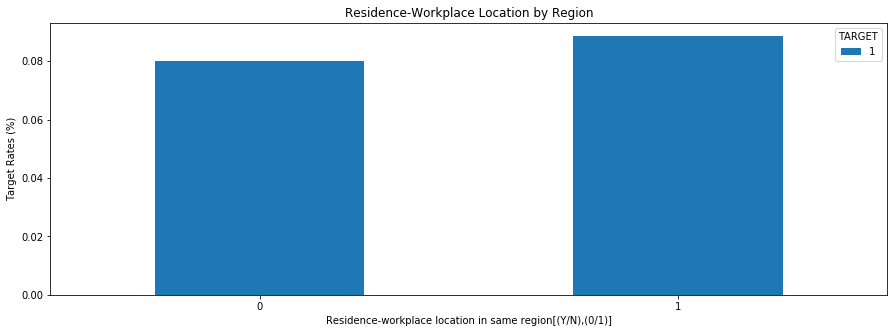

In [54]:
# figure
ax = target_by_livework_region.plot(
    kind='bar',
    grid= False,
    figsize=(15, 5),
    title='Residence-Workplace Location by Region'
)

ax.set_xlabel("Residence-workplace location in same region[(Y/N),(0/1)]")
ax.set_ylabel('Target Rates (%)')
plt.xticks(rotation = 0)

plt.show()

In [55]:
# live and work by region
c = pd.DataFrame(livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].value_counts()/livework_df.groupby(['LIVE_CITY_NOT_WORK_CITY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_livework_city = pd.pivot_table(c, values ='Per_Target', index =['LIVE_CITY_NOT_WORK_CITY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
target_by_livework_city.drop(0, axis = 1, inplace = True)
target_by_livework_city.head()

TARGET,1
LIVE_CITY_NOT_WORK_CITY,
0,0.08
1,0.10


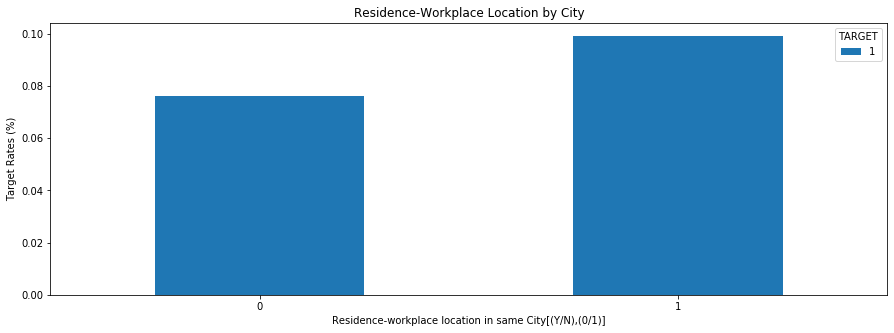

In [56]:
# figure
ax = target_by_livework_city.plot(
    kind='bar',
    grid= False,
    figsize=(15, 5),
    title='Residence-Workplace Location by City'
)

ax.set_xlabel("Residence-workplace location in same City[(Y/N),(0/1)]")
ax.set_ylabel('Target Rates (%)')
plt.xticks(rotation = 0)

plt.show()

Most of the applicants live and work in the same city/region. And applicants who doesn't live and work in the same city/region has the higher chances of default.

### Univariate analysis on continuous columns

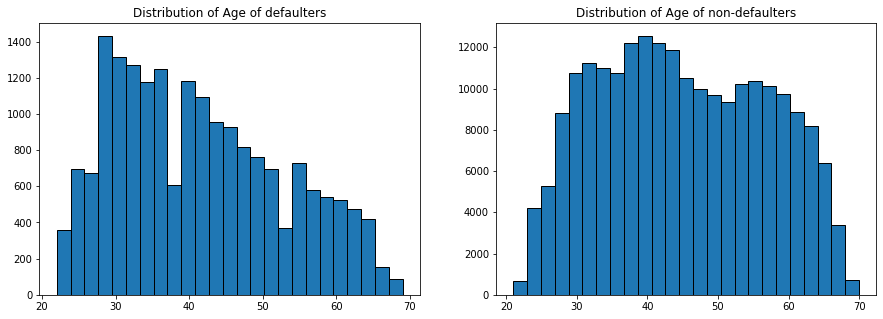

In [57]:
#plotting age 'DAYS_BIRTH' histogram
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_default['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of defaulters')
plt.subplot(1,2,2)
plt.hist(app_target_nondefault['DAYS_BIRTH'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Age of non-defaulters')

plt.show()

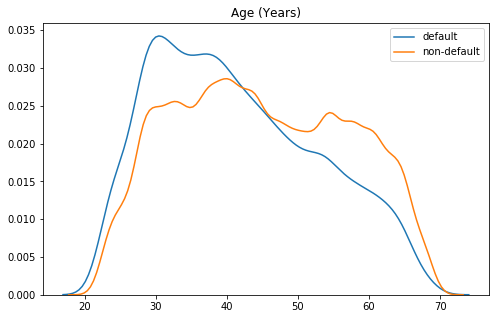

In [58]:
#plotting kde plot of 'DAYS_BIRTH'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['DAYS_BIRTH'], label = 'default')
sns.kdeplot(app_target_nondefault['DAYS_BIRTH'], label = 'non-default')
plt.title(r'Age (Years)')
plt.show()

#### Analysis
Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people.
Non-defaulted people are almost equally distributed.

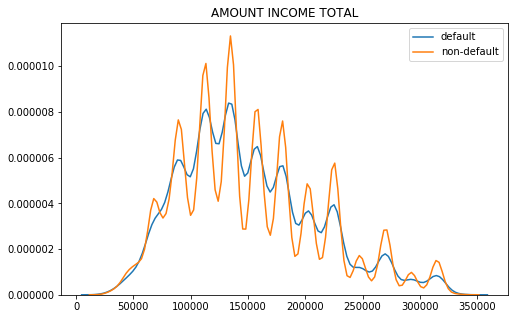

In [59]:
#plotting kde plot of 'AMT_INCOME_TOTAL'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_INCOME_TOTAL'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_INCOME_TOTAL'], label = 'non-default')
plt.title('AMOUNT INCOME TOTAL')
plt.show()

#### Analysis
There are interesting patterns in both the default and non-default people with respect to Income Total. From 75000 to 200000 income has some spikes and then higher the income, the lesser spike we can see for default people. 
However, the pattern is same for both the default and non-default. The frequency range of non-default people is larger than default.

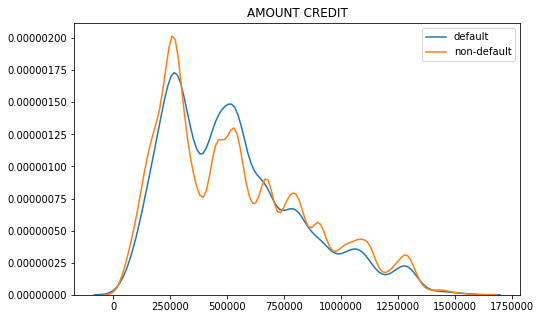

In [60]:
#plotting kde plot of 'AMT_CREDIT'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_CREDIT'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_CREDIT'], label = 'non-default')
plt.title('AMOUNT CREDIT')
plt.show()

#### Analysis
Here, we can see that the lesser loan credit amount, the higher the default chances. We can do bivariate analysis with Occupation Type to find out more insight.

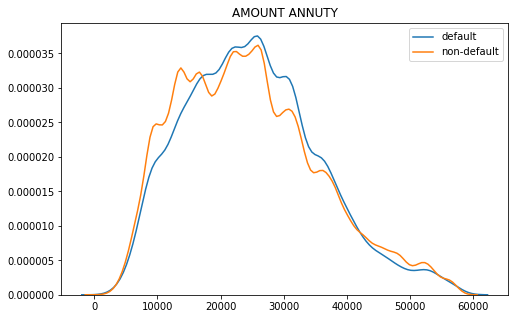

In [61]:
#plotting kde plot of 'AMT_ANNUITY'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_ANNUITY'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_ANNUITY'], label = 'non-default')
plt.title('AMOUNT ANNUTY')
plt.show()

#### Analysis
Here also we can see the same pattern in both the default and non-default. The loan annuty is mostly concentrated within 10000
to 40000 range in both the cases.

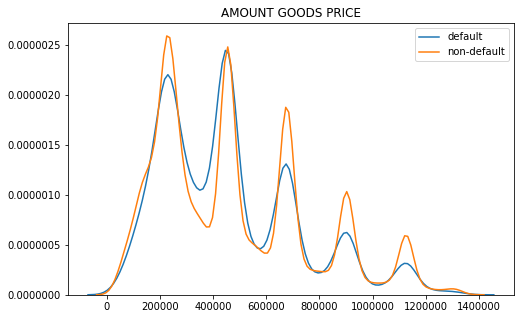

In [62]:
#plotting kde plot of 'AMT_GOODS_PRICE'
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_default['AMT_GOODS_PRICE'], label = 'default')
sns.kdeplot(app_target_nondefault['AMT_GOODS_PRICE'], label = 'non-default')
plt.title('AMOUNT GOODS PRICE')
plt.show()

#### Analysis
Here also we can see an interesting pattern. Both the curves are following the similar frequency distribution. We can see some spikes from 150000 to 220000, then around 500000 price. At this range people are more defaulted and higher the goods price, people are becoming the less defaulted. We can infer that, rich people are buying costly product and thus they are becoming less defaulted.

### Segmented univariate analysis

#### a. Age and Income Category Segmented two variables

In [63]:
# target by days birth
c = pd.DataFrame(application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['AGE_CATEGORY','INCOME_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_ageinc = pd.pivot_table(c, values ='Per_Target', index =['AGE_CATEGORY','INCOME_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_ageinc.drop(0, axis = 1, inplace = True)

target_by_ageinc1 = pd.pivot_table(target_by_ageinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['AGE_CATEGORY'], aggfunc = np.sum) 

target_by_ageinc1

AGE_CATEGORY,Mid Age,Old,Young
INCOME_CATEGORY,,,
High,0.08,0.05,0.10
Low,0.08,0.05,0.12
Medium,0.08,0.05,0.11


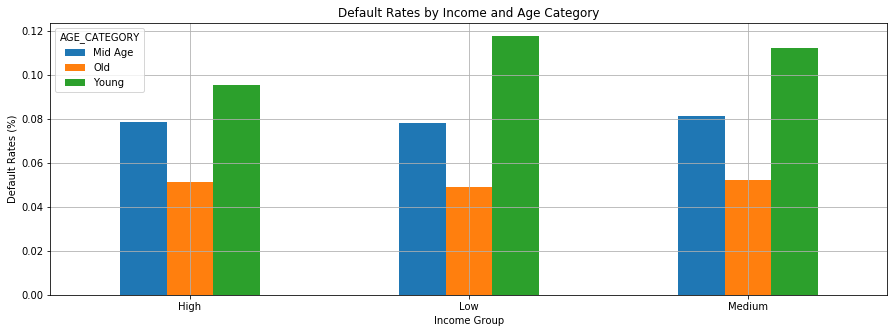

In [64]:
# figure
ax = target_by_ageinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Age Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

We see from the above diagram that irrespective of the income groups, the chances of default decreases as the age of the applicants increases.

#### b. Income and Credit amount category two segmented

In [65]:
# target
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','CREDIT_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_creditinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','CREDIT_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_creditinc.drop(0, axis = 1, inplace = True)

target_by_creditinc1 = pd.pivot_table(target_by_creditinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['CREDIT_CATEGORY'], aggfunc = np.sum) 

target_by_creditinc1

CREDIT_CATEGORY,High,Low,Medium
INCOME_CATEGORY,,,
High,0.07,0.08,0.09
Low,0.07,0.08,0.09
Medium,0.07,0.08,0.09


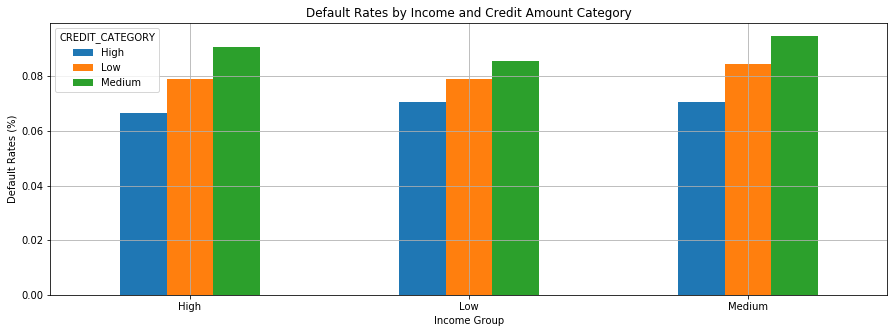

In [66]:
# figure
ax = target_by_creditinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Credit Amount Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

From the above plot, we find that irrespective of the income group, the chances of default increases as the credit amount increases.
Also if we compare credit amount categories by different income groups, then the default rates for all the three credit amount categories are lower in the high income group relative to the medium and low income groups.

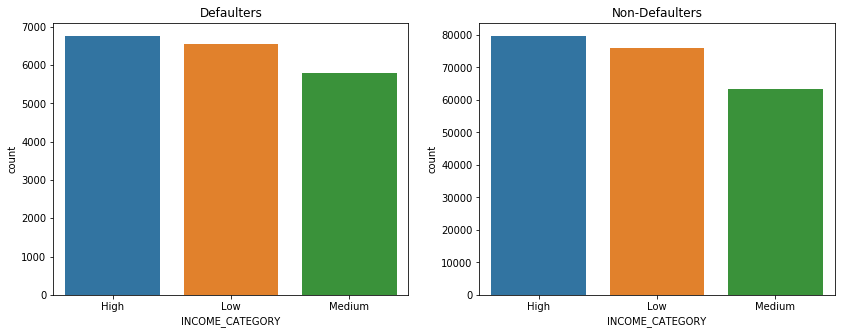

In [67]:
#plotting count plot on INCOME CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

#### Analysis
Low income group has more defaulter followed by high income group.

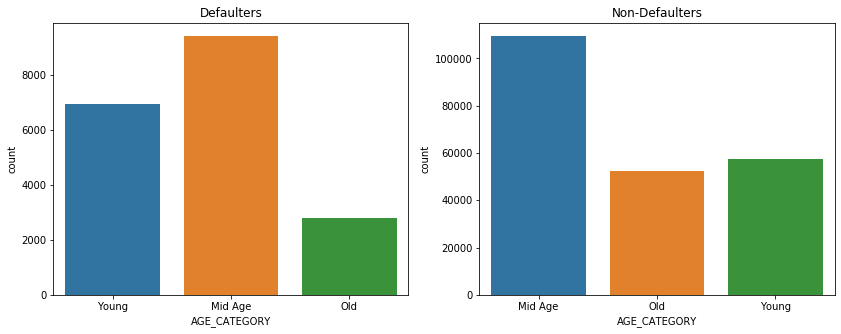

In [68]:
#plotting count plot on AGE_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'AGE_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

#### Analysis
Mid age (35-55) age group of people are more likely to be defaulted followed by the young people.

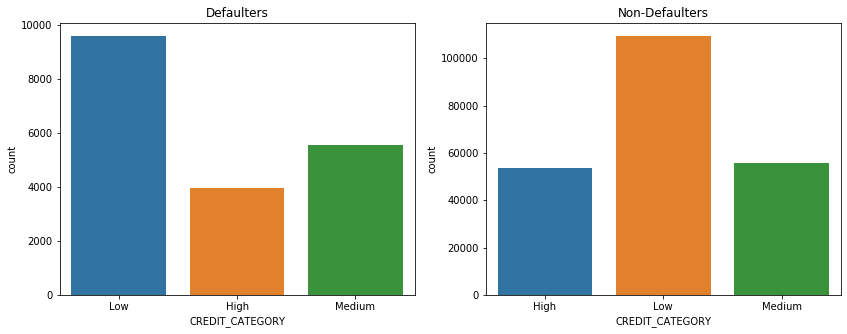

In [69]:
#plotting count plot on CREDIT_CATEGORY segments for both the default and non-default
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=app_target_default)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_CATEGORY',data=app_target_nondefault)
plt.title('Non-Defaulters')
plt.show()

#### Analysis
Low category of loan amount credited people are more likely to be defaulted than high amount loan credit.

Education Status Vs Gender wise defaulters

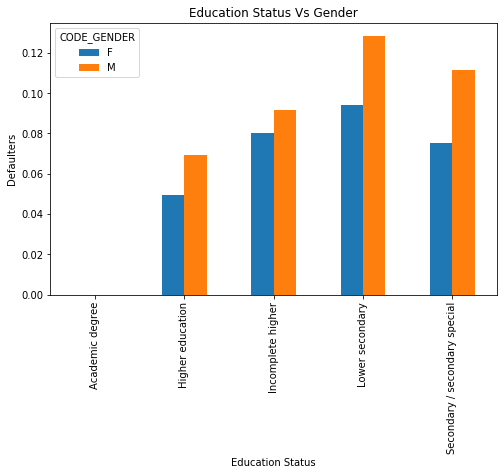

In [70]:
application_df.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Education Status')
plt.ylabel('Defaulters')
plt.title('Education Status Vs Gender')
plt.show()

#### Analysis
Male with lower secondary education are more defaulted followed by Seconday/secondary special education.

Age Group Vs Gender 

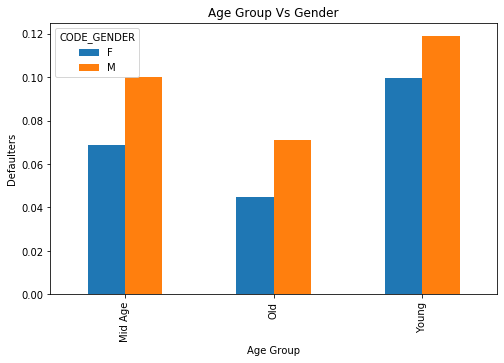

In [71]:
application_df.pivot_table(values='TARGET',index='AGE_CATEGORY',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Age Group')
plt.ylabel('Defaulters')
plt.title('Age Group Vs Gender')
plt.show()

#### Analysis
Young male clients are more in number to be defaulted.

### Bivariate analysis

Correlation of the continuous variables of Defaulter data frame

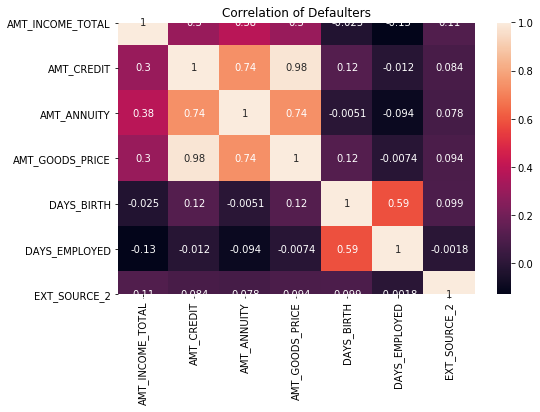

In [72]:
# plotting heatmap where TARGET = 1
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2']
cor = app_target_default[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Defaulters')
plt.show()

#### Analysis
We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are highly correlated.
External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.

Correlation of the continuous variables of Non-Defaulter data frame

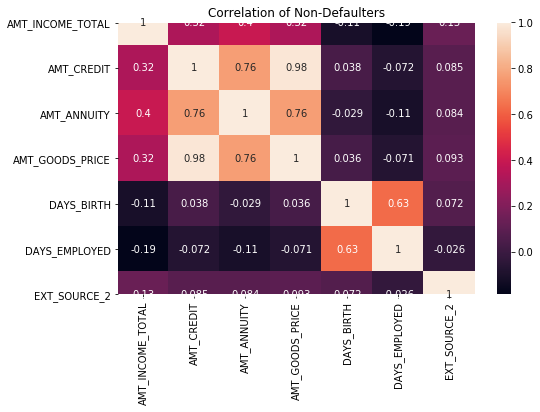

In [73]:
# plotting heatmap where TARGET = 0
cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
              'EXT_SOURCE_2']
cor = app_target_nondefault[cols].corr()
plt.figure(figsize = (8,5))
sns.heatmap(cor, annot = True)
plt.title('Correlation of Non-Defaulters')
plt.show()

#### Analysis
We can see that GOODS_PRICE and AMT_CREDIT, AMT_ANNUTY and AMT_AMT_CREDIT are mederately correlated with each other.
External Rating is highly correlated with all DAYS_BIRTH(Age), GOODS_PRICE, AMT_CREDIT.

#### Bivariate analysis on continuous columns

a. Age and Income

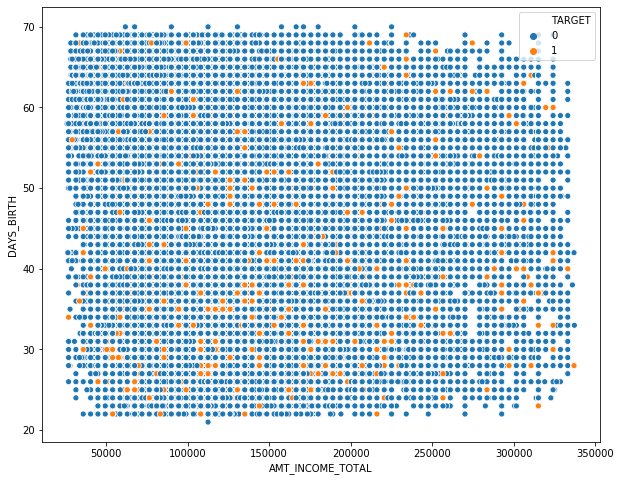

In [74]:
#plotting for AGE and INCOME TOTAL
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_INCOME_TOTAL', 'DAYS_BIRTH', hue='TARGET', data = application_df)
plt.show()

#### Analysis
From the above figure, we see that the number of default applications are concentrated more when the days of birth i.e. age is lower, irrespective of the income.

b. Loan Credit amount and Rating

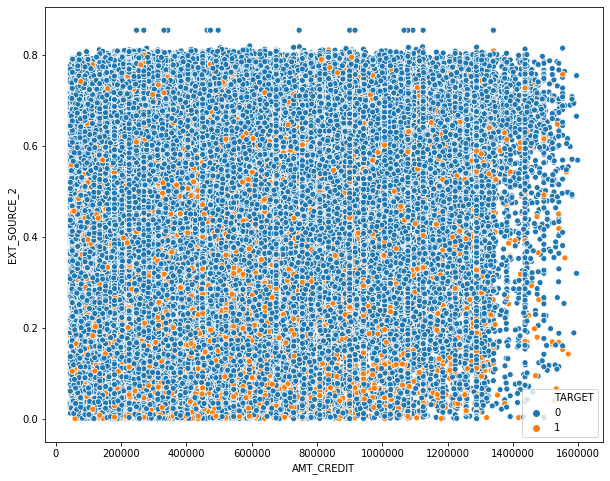

In [75]:
#plotting for CREDIT and EXT Rating
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'EXT_SOURCE_2', hue='TARGET', data = application_df)
plt.show()

#### Analysis
From the above plot, we cannot get much insight as the data is scattered across the plot. However, we can see some concentration of defaulters near the low rating region between 0.0 to 3.0.

c. Loan Credit amount and Total Income

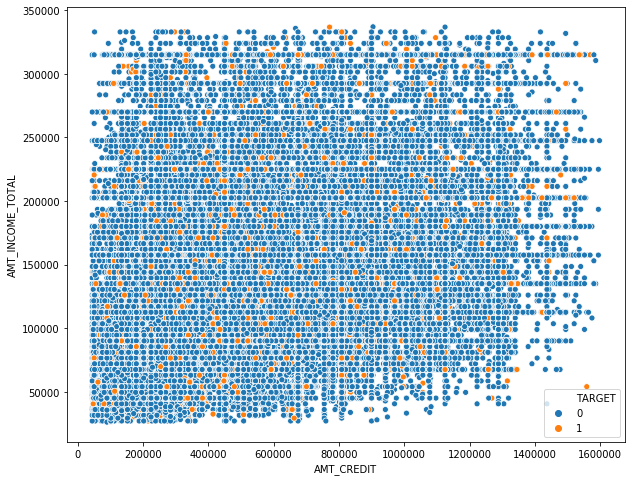

In [76]:
#plotting for CREDIT and EXT Rating
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_INCOME_TOTAL', hue='TARGET', data = application_df)
plt.show()

#### Analysis
Here also, we can hardly find any interesting pattern. 

#### Bivariate analysis on categorical columns

In [77]:
categories = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'INCOME_CATEGORY', 
               'AGE_CATEGORY']

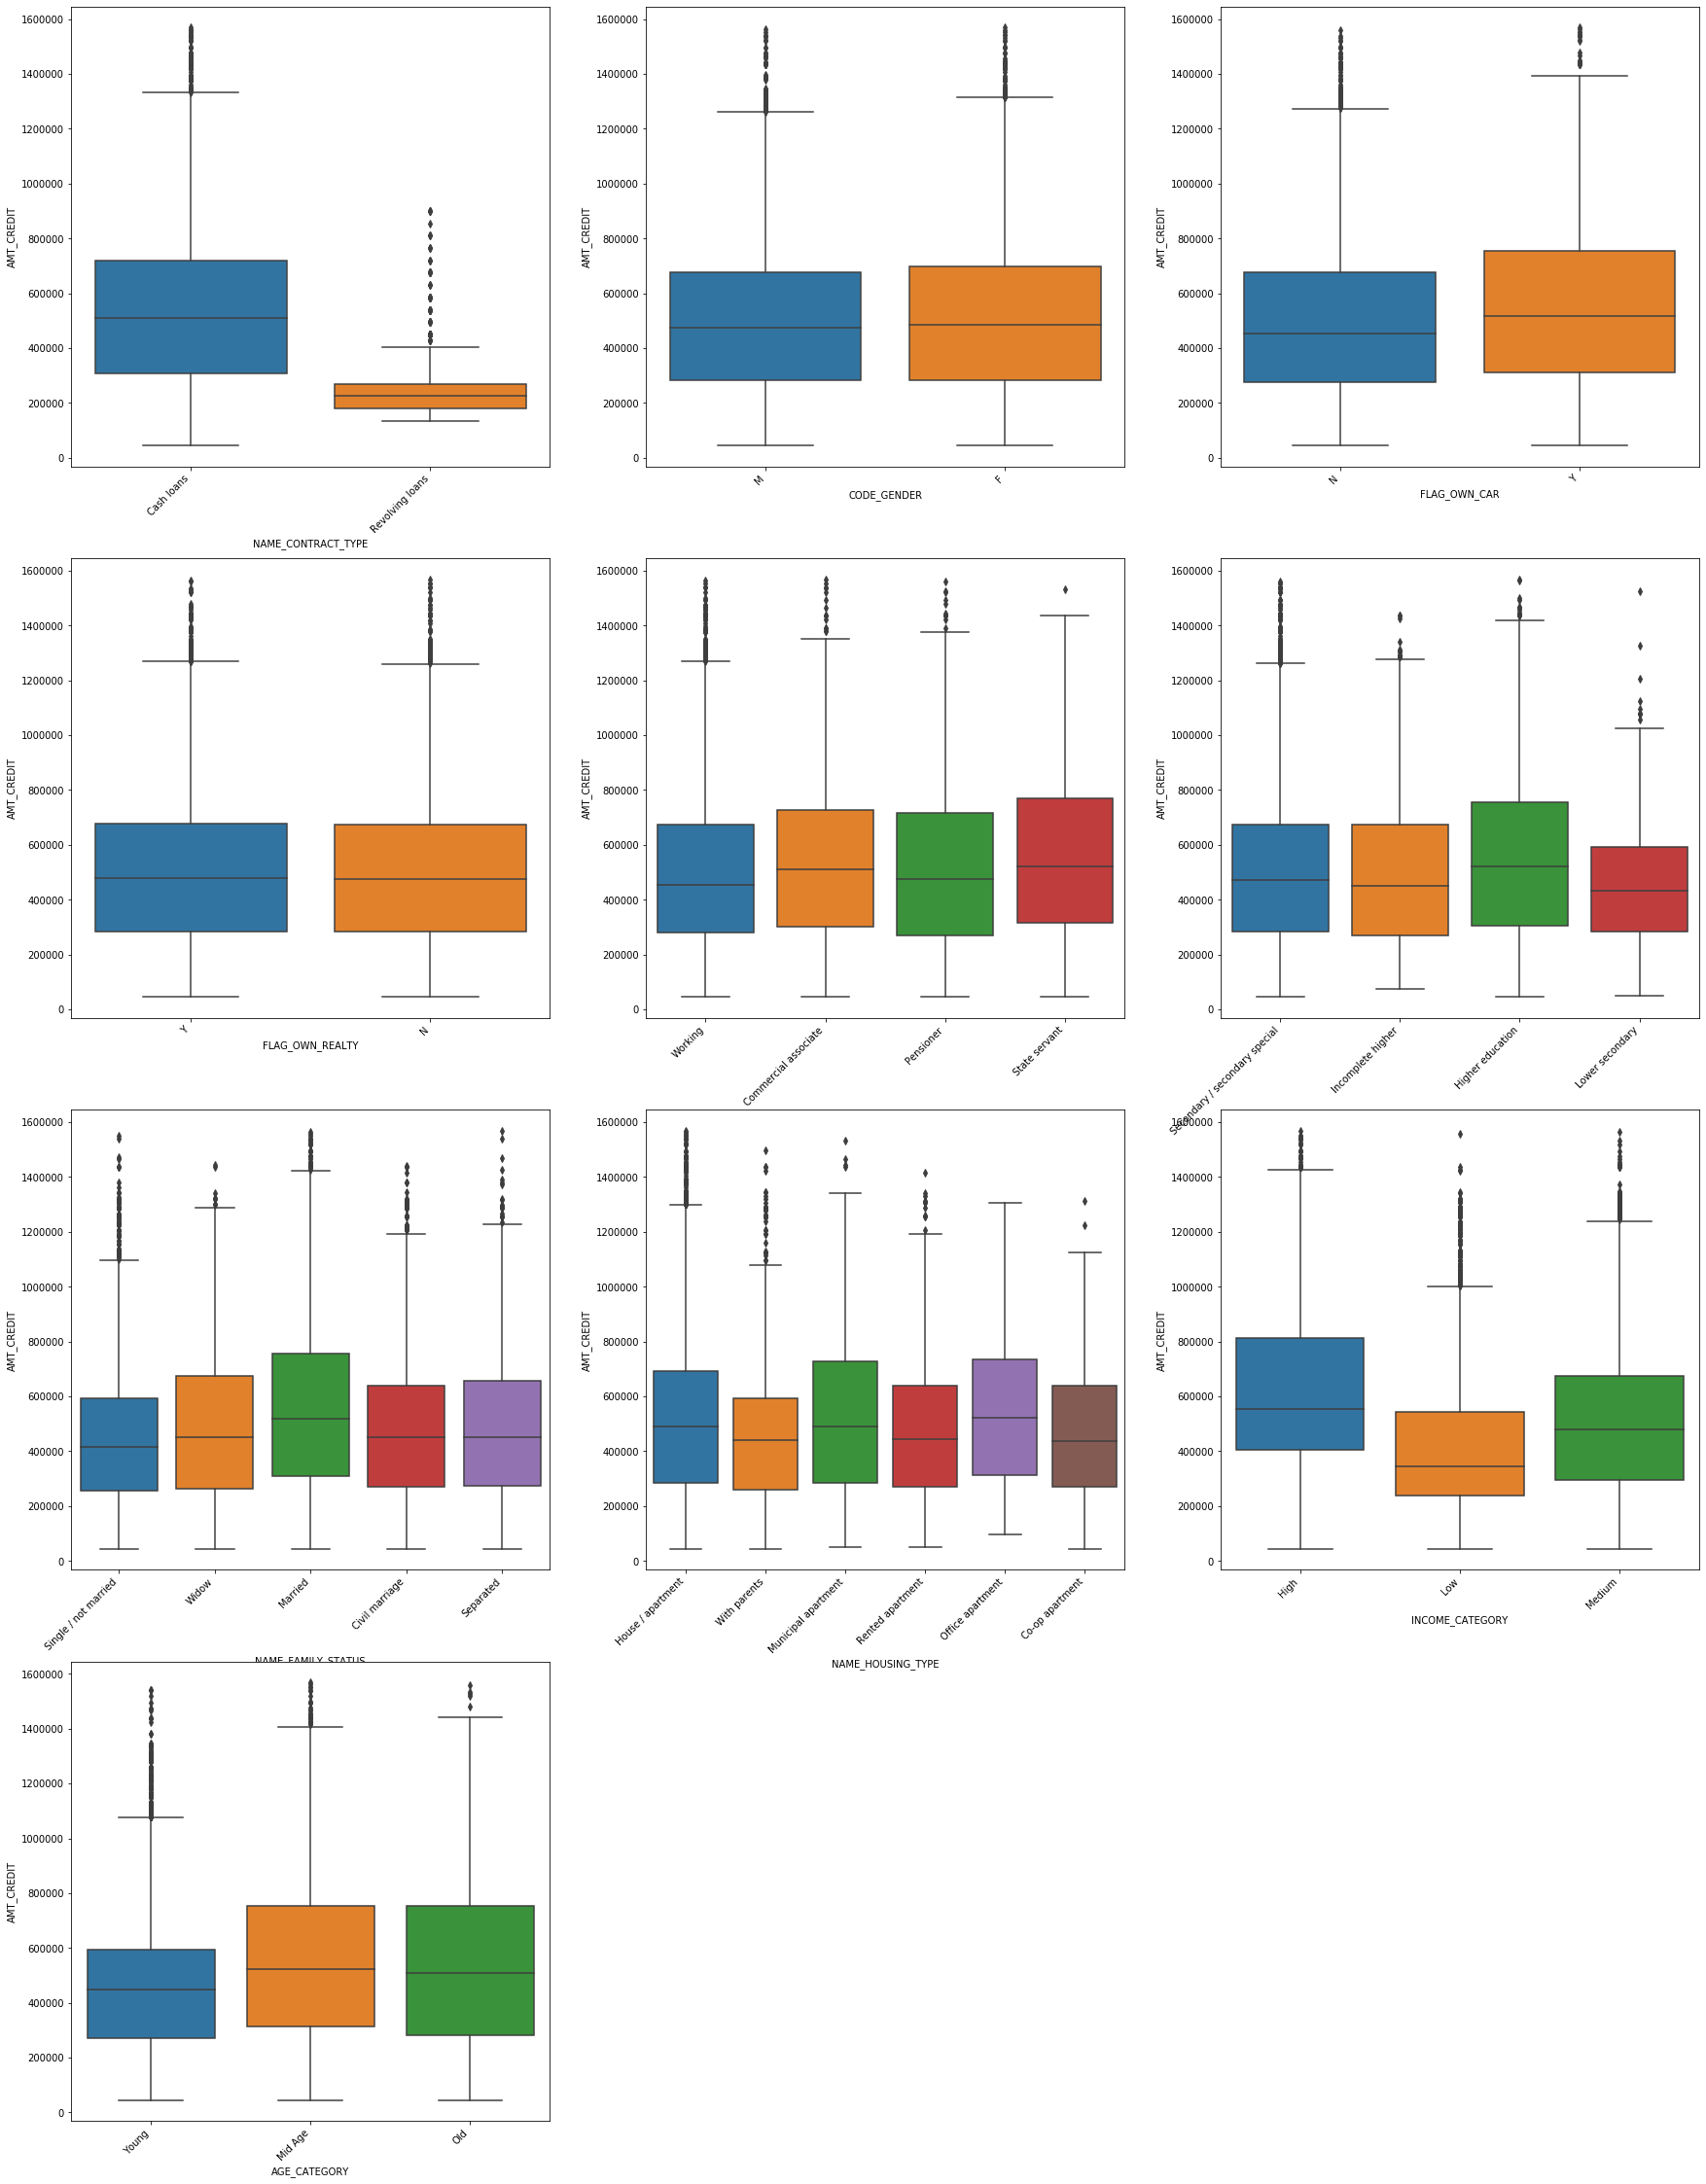

In [78]:
# plotting for Defaulters
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_default)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.

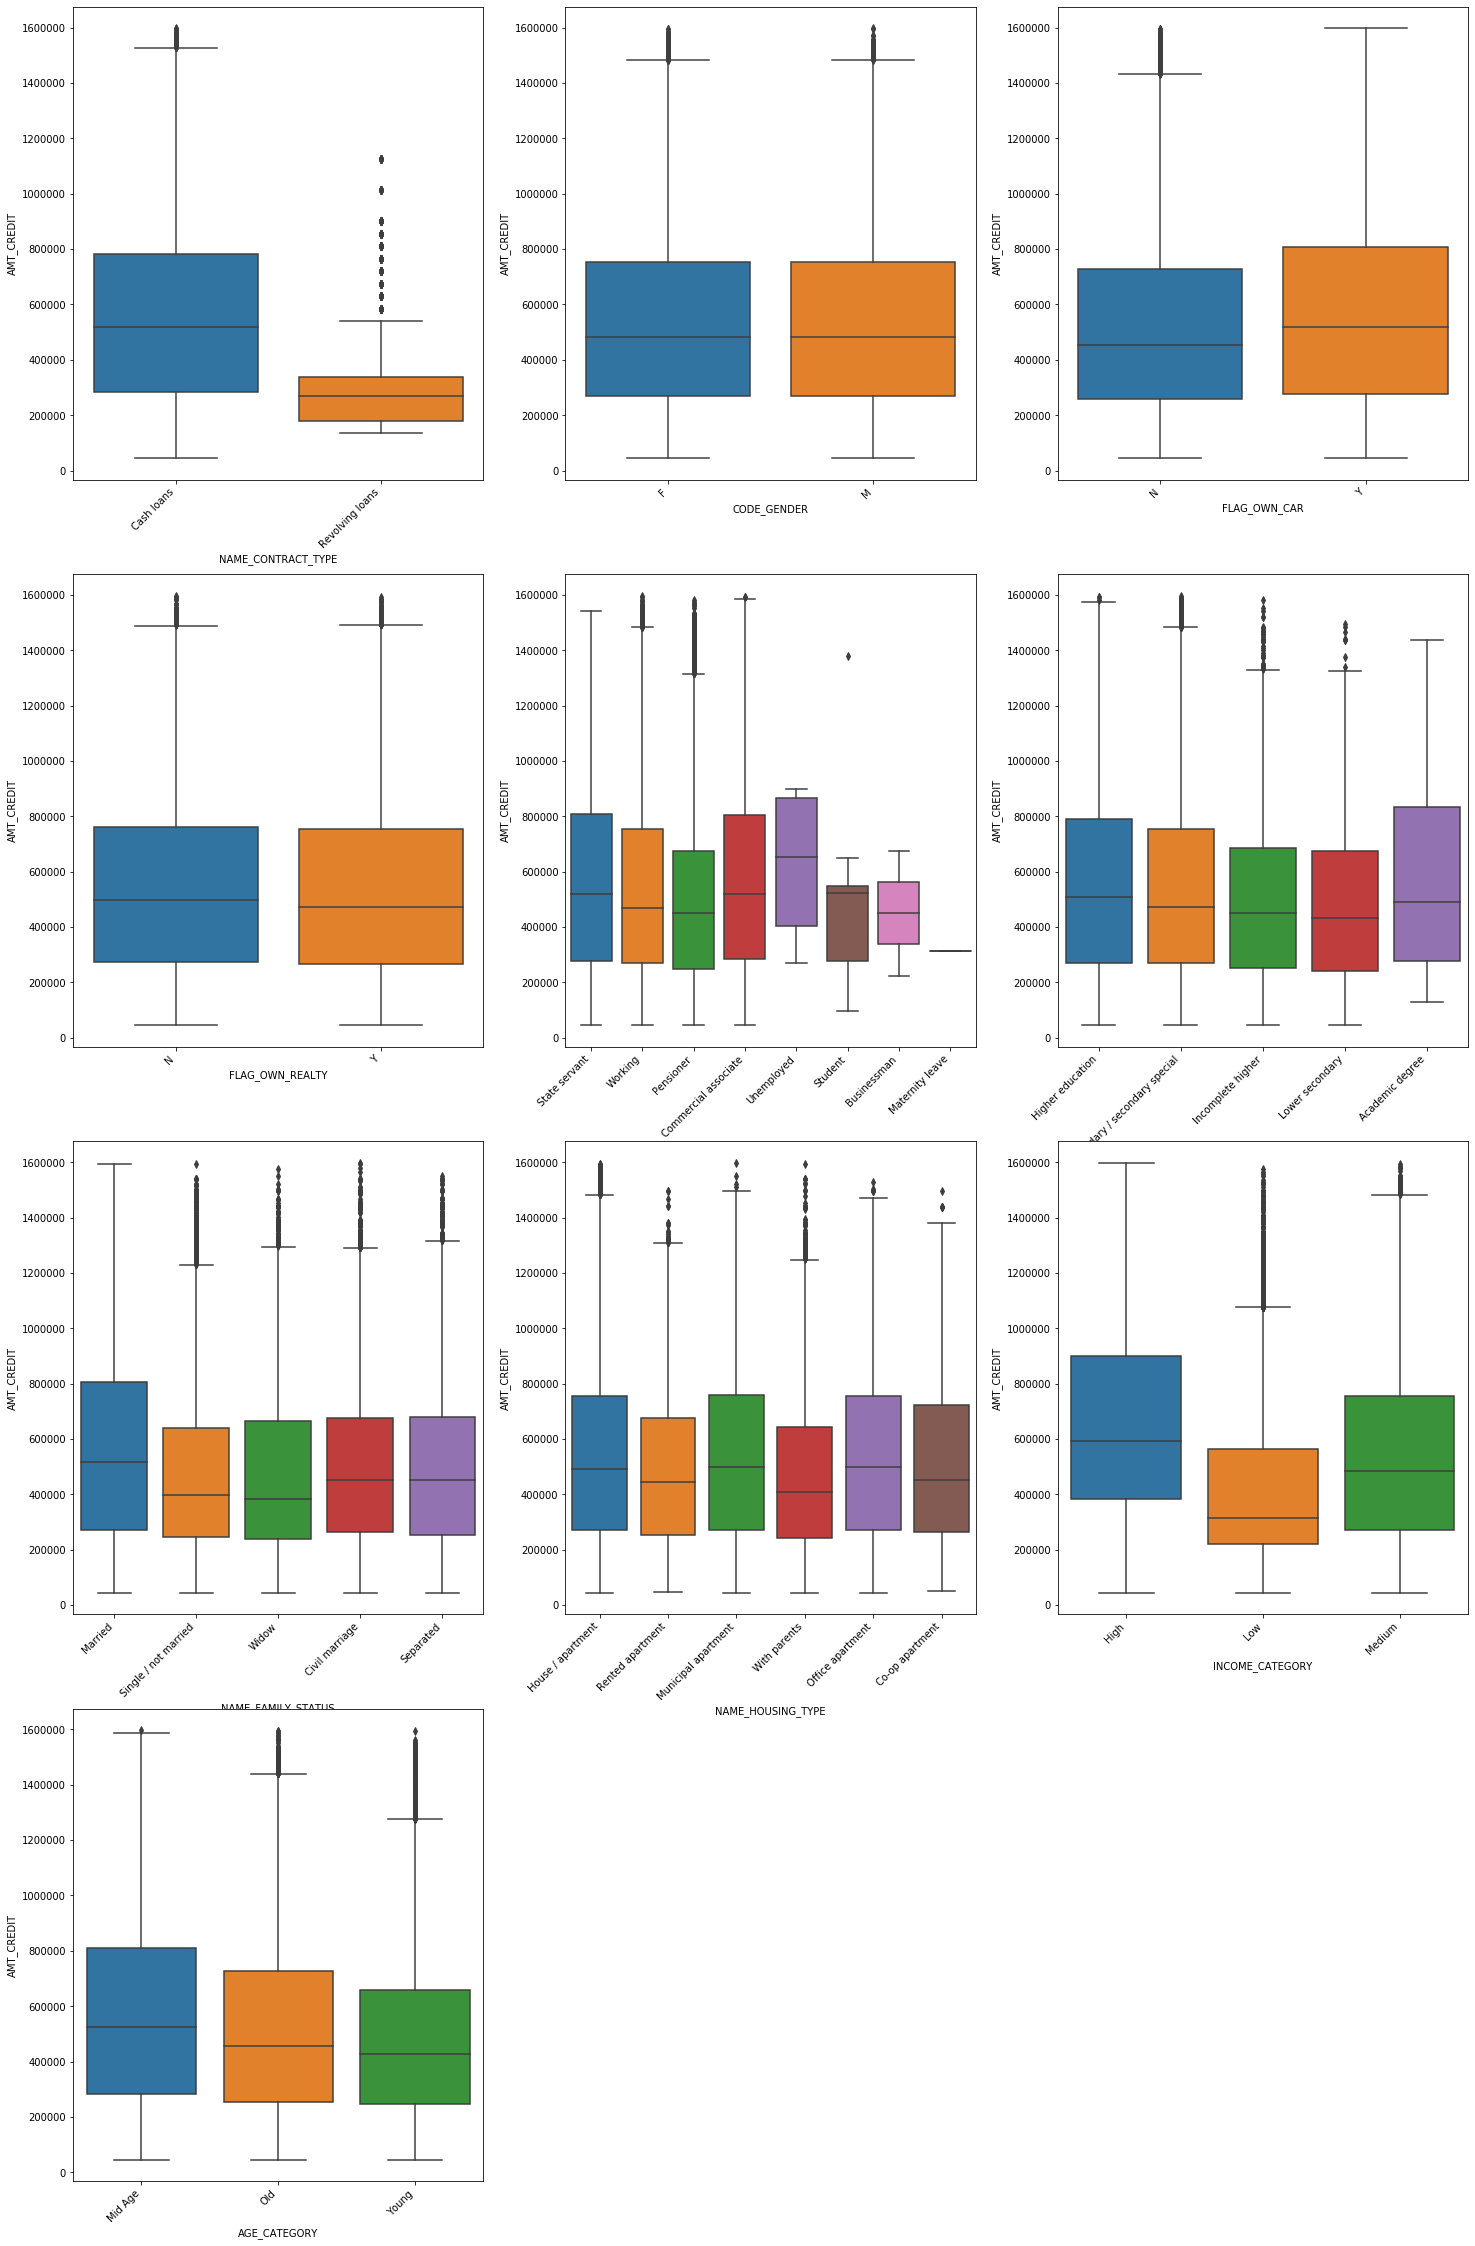

In [79]:
plt.figure(figsize=(25,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_nondefault)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. Cash loans are more credited.
2. Those who are female and own car they got little more number of loans
3. State servent got more number of loans
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.
8. Mig age people got more number of loans.

# Previous Application Data

In [80]:
#loading previous application data
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


### Section IV: Data Quality Check

#### PART A: Missing Value Treatment

In [81]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


In [82]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [83]:
prev_data.shape

(1670214, 37)

In [84]:
#checking for unique values in each columns
for col in prev_data.columns:
    print(col)
    print('------------------')
    print(prev_data[col].unique())

SK_ID_PREV
------------------
[2030495 2802425 2523466 ... 2659632 2785582 2418762]
SK_ID_CURR
------------------
[271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE
------------------
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY
------------------
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT
------------------
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_DOWN_PAYMENT
------------------
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
AMT_GOODS_PRICE
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
WEEKDAY_APPR_PROCESS_START
------------------
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START
------------------
[15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]
FLAG_LAST_APPL_PE

#### There are lot of columns have 'XNA' and 'XAP' values. We are replacing these values with NaN value so that we can treat further.

In [85]:
prev_data.replace('XNA',np.nan,inplace=True)
prev_data.replace('XAP',np.nan,inplace=True)

In [86]:
#checking for missing value perventage columns wise
round(100*(prev_data.isnull().sum() / len(prev_data.index)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.02
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE        95.83
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE             37.56
CODE_REJECT_REASON            81.33
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.12
NAME_GOODS_CATEGORY           56.93
NAME_PORTFOLIO                22.29
NAME_PRODUCT_TYPE             63.68
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

#### Treating missing values by dropping columns more than 30% missing values

In [87]:
#dropping all the columns which has missing value more than 30%
previous_df = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.3], axis = 1)

In [88]:
# dropping columns whicha are not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

previous_df = previous_df.drop(cols_to_be_deleted, axis = 1)

#### Treating missing values row wise

In [89]:
#checking for missing value percentage row wise if 50% columns have missing values
len(previous_df[round(100*(previous_df.isnull().sum(axis = 1) / len(previous_df.columns)),2) >= 50].index)

0

#### Removing missing values `AMT_ANNUITY`, `AMT_GOODS_PRICE`, `CNT_PAYMENT` row wise

In [90]:
#checking number of rows have where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values
print(len(previous_df[np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT'])].index))

333855


In [91]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
previous_df = previous_df[~(np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT']))]
previous_df.shape

(1336359, 13)

In [92]:
#checking for missing value perventage columns wise after removing the rows
round(100*(previous_df.isnull().sum() / len(previous_df.index)),2)

SK_ID_PREV             0.00
SK_ID_CURR             0.00
NAME_CONTRACT_TYPE     0.00
AMT_ANNUITY            2.87
AMT_APPLICATION        0.00
AMT_CREDIT             0.00
AMT_GOODS_PRICE        3.87
NAME_CONTRACT_STATUS   0.00
DAYS_DECISION          0.00
NAME_CLIENT_TYPE       0.07
NAME_PORTFOLIO         2.87
CHANNEL_TYPE           0.00
CNT_PAYMENT            2.87
dtype: float64

In [93]:
round(previous_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)

,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_PAYMENT
count,1297979.00,1284699.00,1297984.00
mean,15955.12,227847.28,16.05
std,14782.14,315396.56,14.57
min,0.00,0.00,0.00
5%,2726.59,22882.50,0.00
25%,6321.78,50841.00,6.00
50%,11250.00,112320.00,12.00
75%,20658.42,234000.00,24.00
90%,34703.82,585000.00,36.00
95%,45336.78,900000.00,48.00


#### We can see there are outliers are present in these columns

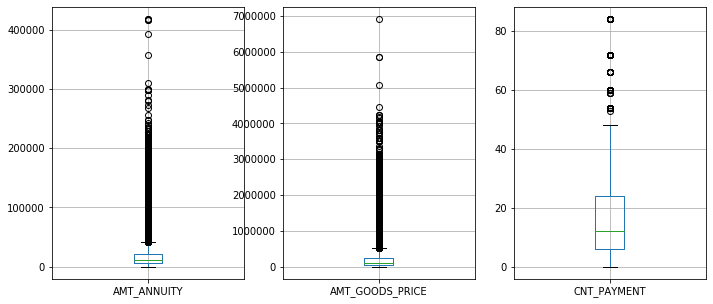

In [94]:
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    previous_df.boxplot(column = col)
plt.show()

#### Removing outliers useing 1.5 IQR method

In [95]:
# removing outliers using 1.5 IQR method
for col in cols: 
    q1 = previous_df[col].quantile(0.25)
    q3 = previous_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    previous_df = previous_df.loc[(previous_df[col] > range_low) & (previous_df[col] < range_high)]

In [96]:
# percentage data lost 
100 * ((prev_data.shape[0] - previous_df.shape[0]) / prev_data.shape[0])

40.129827674777005

#### Around 40% data we have lost after this operation

#### After removing outliers, we have only 0.06% missing value present in the data frame for NAME_CLIENT_TYPE. We are not treating these missing values.

In [97]:
# converting all DAYS columns to month columns
previous_df['DAYS_DECISION'] = abs(previous_df['DAYS_DECISION'] // 30)

In [98]:
previous_df.dtypes

SK_ID_PREV                int64
SK_ID_CURR                int64
NAME_CONTRACT_TYPE       object
AMT_ANNUITY             float64
AMT_APPLICATION         float64
AMT_CREDIT              float64
AMT_GOODS_PRICE         float64
NAME_CONTRACT_STATUS     object
DAYS_DECISION             int64
NAME_CLIENT_TYPE         object
NAME_PORTFOLIO           object
CHANNEL_TYPE             object
CNT_PAYMENT             float64
dtype: object

#### All the data types of this data frame looks good. so we are not changing the data type of any column

In [99]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','INCOME_CATEGORY','AGE_CATEGORY','CREDIT_CATEGORY', 'DAYS_BIRTH']
application_sub = application_df[cols]
application_sub.head()


,SK_ID_CURR,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY,DAYS_BIRTH
0,100002,1,M,Secondary / secondary special,Single / not married,High,Young,Low,26
1,100003,0,F,Higher education,Married,High,Mid Age,High,46
2,100004,0,M,Secondary / secondary special,Single / not married,Low,Mid Age,Low,53
4,100007,0,M,Secondary / secondary special,Single / not married,Medium,Mid Age,Medium,55
5,100008,0,M,Secondary / secondary special,Married,Low,Mid Age,Medium,47


#### Merging previous application data with application data for further analysis

In [100]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(previous_df,application_sub, on='SK_ID_CURR', how='left')
merged.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,CNT_PAYMENT,TARGET,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,INCOME_CATEGORY,AGE_CATEGORY,CREDIT_CATEGORY,DAYS_BIRTH
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,Approved,3,Repeater,POS,Country-wide,12.00,0.00,F,Incomplete higher,Married,High,Mid Age,Medium,40.00
1,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,Approved,11,Repeater,Cash,Credit and cash offices,12.00,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan
2,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,Refused,27,Repeater,Cash,Credit and cash offices,24.00,0.00,F,Secondary / secondary special,Married,High,Young,Medium,28.00
3,1383531,199383,Cash loans,23703.93,315000.00,340573.50,315000.00,Approved,23,Repeater,Cash,Credit and cash offices,18.00,0.00,M,Secondary / secondary special,Civil marriage,Medium,Old,High,58.00
4,2257824,161140,Cash loans,13832.77,211500.00,246397.50,211500.00,Approved,28,Repeater,Cash,Credit and cash offices,30.00,0.00,F,Secondary / secondary special,Separated,Medium,Old,Low,64.00


In [101]:
# checking for the null value column wise
merged.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NAME_CONTRACT_TYPE           0
AMT_ANNUITY                  0
AMT_APPLICATION              0
AMT_CREDIT                   0
AMT_GOODS_PRICE              0
NAME_CONTRACT_STATUS         0
DAYS_DECISION                0
NAME_CLIENT_TYPE           628
NAME_PORTFOLIO               0
CHANNEL_TYPE                 0
CNT_PAYMENT                  0
TARGET                  316938
CODE_GENDER             316938
NAME_EDUCATION_TYPE     316938
NAME_FAMILY_STATUS      316938
INCOME_CATEGORY         316938
AGE_CATEGORY            316938
CREDIT_CATEGORY         316938
DAYS_BIRTH              316938
dtype: int64

In [102]:
#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]

#### Univariate Analysis on categorical columns

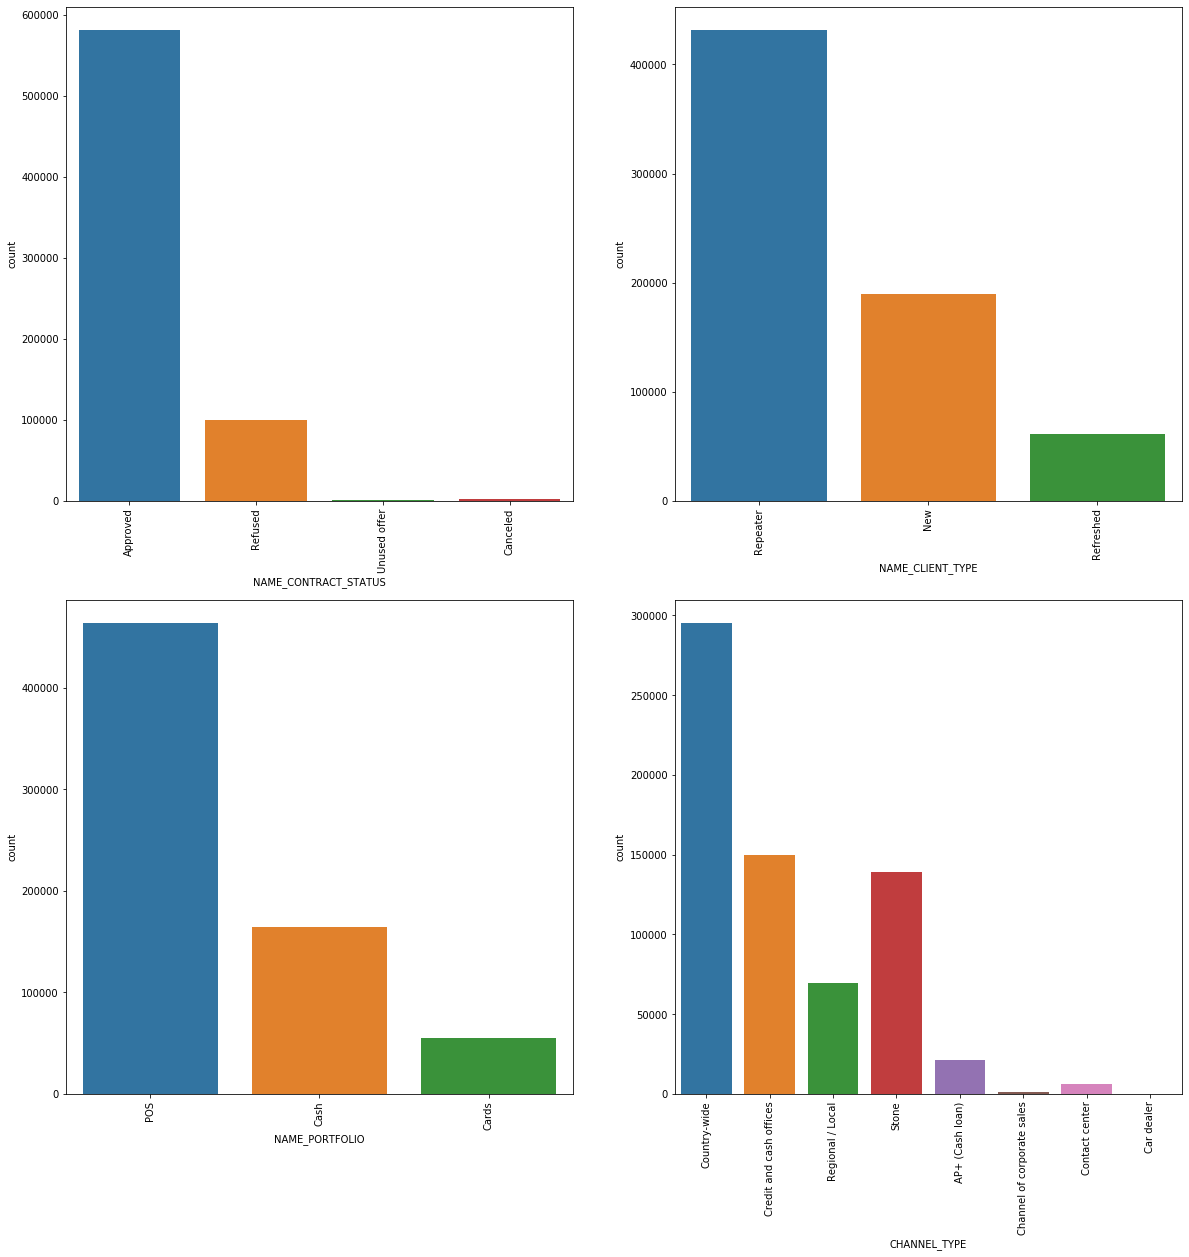

In [103]:
#plotting count plot for categorical columns
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

#### Analysis
1. Approved loan status is huge than rejected or canceled.
2. Repeater clients are highest in number than new client.
3. POS loans are highest rather than cash loans.
4. Country-wide channel type is the most used channel followed by Credit and cash offers.

#### Univariate analysis on continuous columns

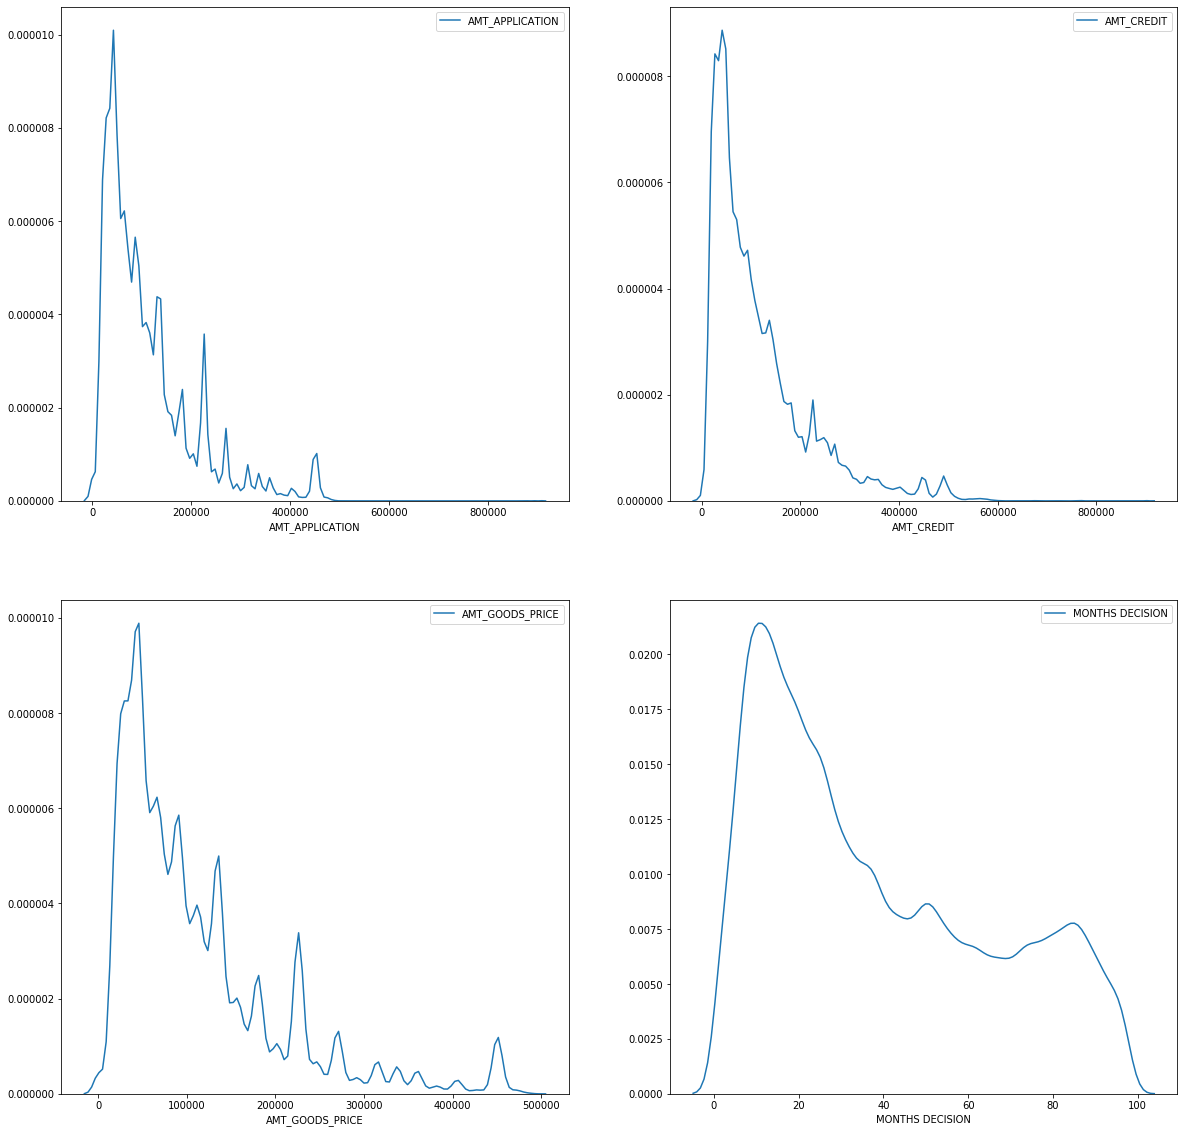

In [104]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

#### Analysis
1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots. 
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Becasue, based on the price of the goods, the loan was approved and amount was credited.
4. Most of the applications decision took around 10 to 30 months.

### Bivariate analysis

In [105]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_BIRTH']]

subset.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_DECISION,CNT_PAYMENT,DAYS_BIRTH
0,1730.43,17145.00,17145.00,17145.00,3,12.00,40.00
2,31924.40,337500.00,404055.00,337500.00,27,24.00,28.00
3,23703.93,315000.00,340573.50,315000.00,23,18.00,58.00
4,13832.77,211500.00,246397.50,211500.00,28,30.00,64.00
5,12165.21,148500.00,174361.50,148500.00,29,24.00,55.00


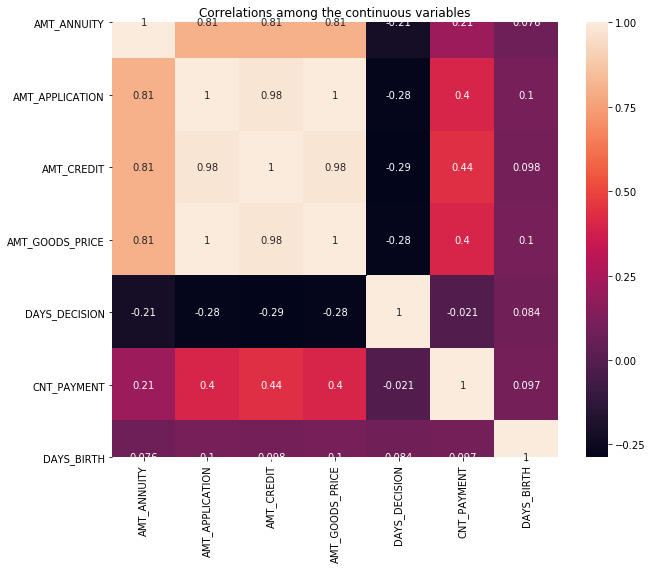

In [106]:
plt.figure(figsize = (10,8))
cor = subset.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlations among the continuous variables')
plt.show()

#### Analysis
There are strong correlations between below variables
DAYS_BIRTH(AGE) is correlated with all the variables
AMT_APPLICATION is correlated with AMT_ANNUTY, AMT_AMT_CREDIT, AMT_GOODS_PRICE

#### Bivariate analysis on continuous columns

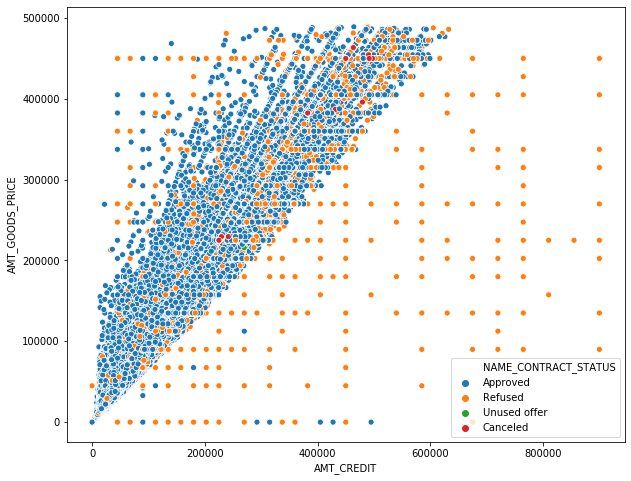

In [107]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_CREDIT', 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

#### Analysis
AMT_GOODS_PRICE and AMT_CREDIT are posotively correlated and mostly concentrated near the lower region. High AMT_CREDIT loans are most likely to be refused.

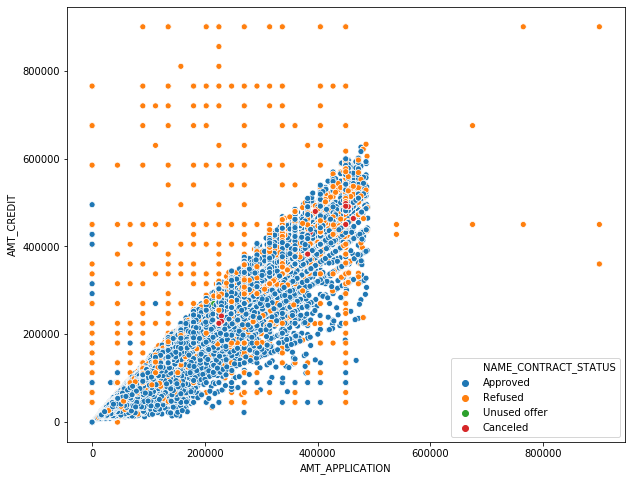

In [108]:
plt.figure(figsize = (10,8))
sns.scatterplot('AMT_APPLICATION', 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

#### Analysis
Credit amount and the application is highly correlated.

#### Bivariate analysis on categorical columns

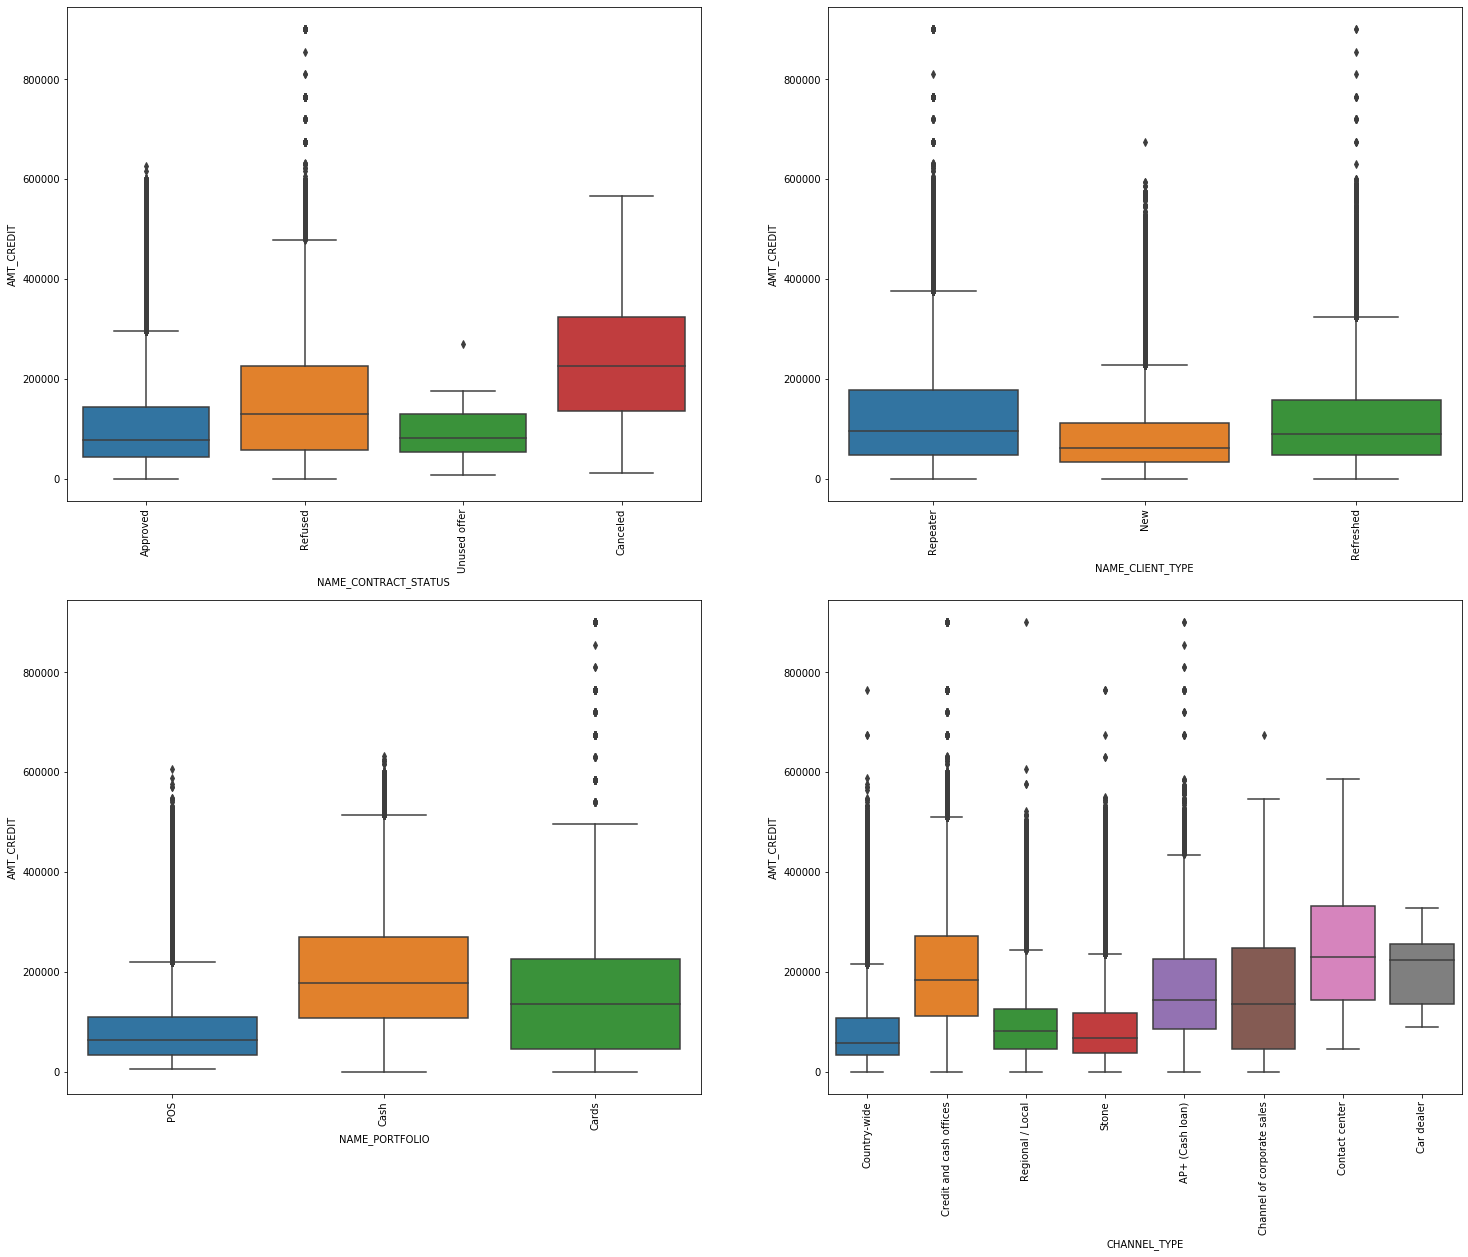

In [109]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

#### Analysis
1. Most of the amount credit was cancelled in status
2. Repeater client got more loan credit
3. Cash loan got more credited.
4. Through the contact center channel, more loan got credited.

### Segmented univariate analysis

In [110]:
print(round(application_df['AMT_GOODS_PRICE'].describe(), 3))
q50 = application_df['AMT_GOODS_PRICE'].quantile(0.5)
q75 = application_df['AMT_GOODS_PRICE'].quantile(0.75)

# creating Credit amount groups
def goodsprice_category(value):
    if value <= q50:
        return 'Low'
    elif value > q50 and value <= q75:
        return 'Medium'
    else:
        return 'High'

application_df['GOODSPRICE_CATEGORY'] = application_df['AMT_GOODS_PRICE'].apply(goodsprice_category)

count    238066.00
mean     477316.36
std      285050.20
min       40500.00
25%      229500.00
50%      450000.00
75%      675000.00
max     1341000.00
Name: AMT_GOODS_PRICE, dtype: float64


In [111]:
pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts())

TARGET
INCOME_CATEGORY GOODSPRICE_CATEGORY TARGET        
High            High                0        26029
                                    1         1669
                Low                 0        32408
                                    1         3324
                Medium              0        21240
                                    1         1767
Low             High                0         8164
                                    1          496
                Low                 0        52361
                                    1         4861
                Medium              0        15518
                                    1         1186
Medium          High                0        13322
                                    1          901
                Low                 0        34607
                                    1         3658
                Medium              0        15323
                                    1         1232

In [112]:
# target
c = pd.DataFrame(application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].value_counts()/application_df.groupby(['INCOME_CATEGORY','GOODSPRICE_CATEGORY'])['TARGET'].count())
c.columns = ['Per_Target']

target_by_priceinc = pd.pivot_table(c, values ='Per_Target', index =['INCOME_CATEGORY','GOODSPRICE_CATEGORY'], 
                         columns =['TARGET'], aggfunc = np.sum) 
#target_by_creditinc = target_by_creditinc.sort_values([0])
# resetting index 
target_by_priceinc.drop(0, axis = 1, inplace = True)

target_by_priceinc1 = pd.pivot_table(target_by_priceinc, values = 1, index =['INCOME_CATEGORY'], 
                         columns =['GOODSPRICE_CATEGORY'], aggfunc = np.sum) 

target_by_priceinc1

GOODSPRICE_CATEGORY,High,Low,Medium
INCOME_CATEGORY,,,
High,0.06,0.09,0.08
Low,0.06,0.08,0.07
Medium,0.06,0.10,0.07


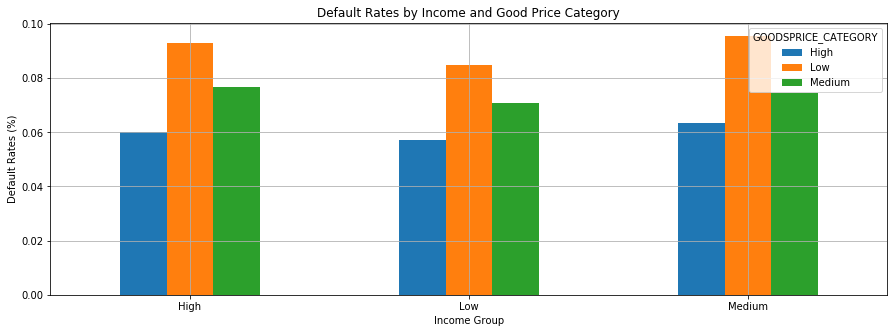

In [113]:
# figure
ax = target_by_priceinc1.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Good Price Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

#### Analysis
From the above analysis, we find that irrespective of the income groups, the lowest price of the good has the highest chances of default.Interestingly, the highest price category of goods has the lowest probability of default for all the income groups.

Previous loan Status Vs Current Defaulters Plot

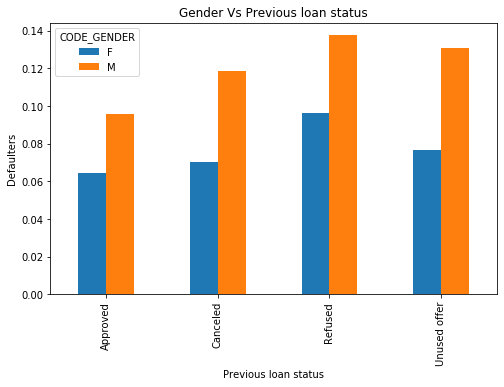

In [114]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Gender Vs Previous loan status')
plt.show()

#### Analysis
Male clients are more defaulted than female client. Also, previously refused customer are more defaulted in current application.

Client Type Vs Previous loan status plot

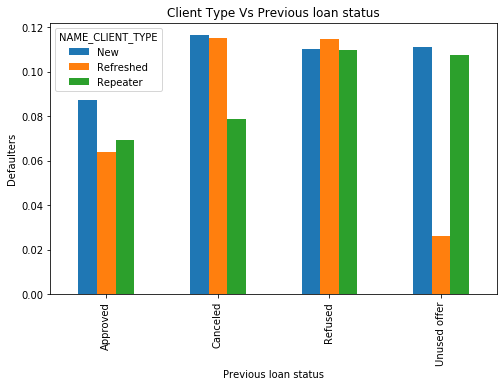

In [115]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Client Type Vs Previous loan status')
plt.show()

#### Analysis
Previously cancelled New and Refreshed clients are more defaulted than repeater clients

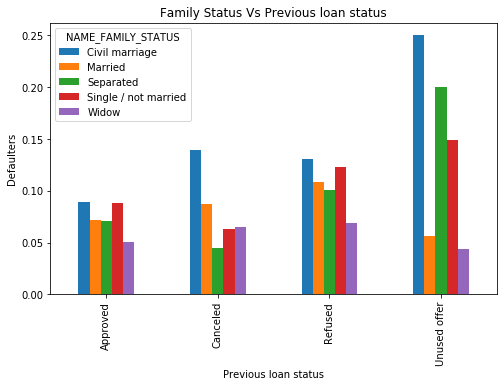

In [116]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_FAMILY_STATUS',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Family Status Vs Previous loan status')
plt.show()

#### Analysis
Client who did civil marriage with previously unused loan offers ar more defaulted currently.

Edducatuion status Vs Previous loan status

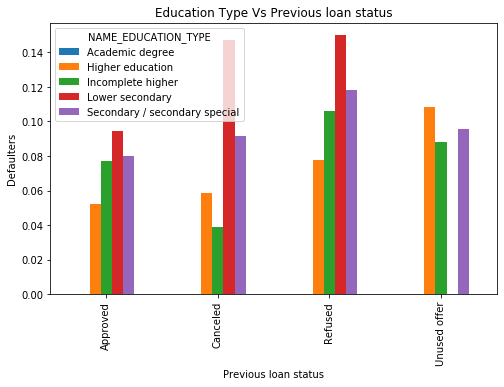

In [117]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_EDUCATION_TYPE',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Previous loan status')
plt.ylabel('Defaulters')
plt.title('Education Type Vs Previous loan status')
plt.show()

#### Analysis
Previously refused people with lower secondary education are more defaulted in current application.